# **Ayudantia 8**: 

### **Exploracion y Analisis de los datos de las diferencias socioeconómicas en la postulación a las Universidades en Chile**

### **Contexto y Motivación:**

Diversos estudios han indicado que en Chile existe una estrecha relación  entre las desigualdades socioeconómicas y el acceso a la educación superior (Canales, A. 2016). Incluso, dicha problemática fue una de las principales contiendas durante el estallido social de 2019, debido a que la población percibe una correlación entre el nivel socioeconómico y el acceso a una educación obligatoria de calidad, y, por consiguiente, el rendimiento en las pruebas de selección (Mena, H. 2022). Dicho rendimiento se ve reflejado en cierta medida en el grado de calidad académica a la que podrá acceder el estudiante.

Por consiguiente, el análisis se orienta hacia la comprensión de la relación entre desigualdades socioeconómicas y acceso a la educación superior en Chile. La motivación del proyecto es fomentar una mayor comprensión y destacar si existe una conexión directa entre el nivel socioeconómico, la calidad educativa y el acceso a la educación superior mediante la divulgación de estos resultados.





#### **Preguntas de objetivo:**

1. ¿Existe una relación entre el tipo de establecimiento educacional y el puntaje ponderado de la PAES? ¿En las pruebas obligatorias, se observan diferencias?

2. ¿Existen diferencia entre el ingreso familiar y el puntaje de admisión? ¿En las pruebas obligatorias, se observan diferencias?

3. ¿Como se distribuyen los promedios de las pruebas obligatorias de la PAES en un mapa de Chile (nivel nacional)? ¿Existen diferencias entre las regiones? ¿En el caso de existir diferencias, estas se pueden explicar por factores socioeconómicos? ¿El problema de la educación chilena es algo generalizado en las regiones?

4. ¿Existen diferencias en los puntajes de admisión entre géneros? ¿En qué áreas son más pronunciadas?

5. ¿Existe una relación entre el promedio de notas en la enseñanza media y los puntajes de admisión?

6. ¿El ingreso socioeconomico junto a variables tipo 'conexion a internet' puede influir en el desempeño de los estudiantes en la PAES?



### **Datos:**

Los datos fueron extraídos en su mayoría de https://datosabiertos.mineduc.cl/, los cuales corresponden al año 2023, a excepción de los límites geográficos de las regiones de Chile, obtenidos de https://www.bcn.cl/siit/mapas_vectoriales/index_html. En cuanto al tratamiento de los datos, se puede encontrar información detallada en el notebook 'limpieza_tratamiento.ipynb', donde se describe el proceso de limpieza y tratamiento de los mismos. Además, en dicho notebook se exportan los datos tratados a un archivo '.parquet' para su posterior uso.

Las siguientes variables se escogieron debido que se consideran relevantes para el análisis, ademas su explicacion es la siguiente:

Variables seleccionadas del dataframe `df_estudiantes`:

| Campo  | Tipo   | Descripción                                                  |
|--------|--------|--------------------------------------------------------------|
| RBD          | int    | Corresponde a un identificador del establecimiento en la base de datos.                                      |
| MRUN   | int  | Corresponde a un rut mascara para identificar a los estudiantes en la base de datos. |
| SEXO         | int    | Variable binaria que representa el género: 1 para Masculino, 2 para Femenino.                                  |
| DEPENDENCIA | str | Variable categórica que representa el tipo de dependencia del establecimiento: GRATUITO <br>PARTICULAR SUBVENCIONADO <br> PARTICULAR <br> CORPORACION|
|CODIGO_REGION_DOMICILIO| int | Corresponde al código de la región del establecimiento.|
| CODIGO_COMUNA_DOMICILIO | int | Corresponde al código de la comuna del establecimiento.|
| INGRESO_PERCAPITA_GRUPO_FA | int  | Categoría de deciles de ingresos per cápita familiar: <br> 1: $0-$71,093, <br> 2: $71,094-$112,383, <br> 3: $112,384-$148,930, <br> 4: $148,931-$185,460, <br> 5: $185,461-$226,261, <br> 6: $226,262-$284,709, <br> 7: $284,710-$361,741, <br> 8: $361,742-$487,065, <br> 9: $487,066-$792,143, <br>  10: $792,144 y más, <br> 99: Prefiero no responder |
| CONEXION_INSUFICIENTE         | int  | Categoría de conexión a internet: <br> 1: Nunca o casi nunca, <br> 2: Unas pocas veces, <br> 3: A menudo, <br> 4: Siempre o casi siempre, <br> 5: No requería de conexión a internet para realizar mis labores académicas, <br> 9: Prefiero no responder |
|PROMEDIO_NOTAS| Float  | Corresponde a un valor entre 1.0 a 7.0
| PTJE_NEM     | Float  | Corresponde a un valor entre 100 a 1000.                                                                     |
| PTJE_RANKING | Float  | Corresponde a un valor entre 100 a 1000.
| CLEC_MAX     | Float  | Corresponde a un valor entre 100 a 1000. Cuando este valor es 0, significa que el estudiante no rindió la prueba PAES. |
| MATE1_MAX    | Float  | Corresponde a un valor entre 100 a 1000. Cuando este valor es 0, significa que el estudiante no rindió la prueba PAES. |





Variables seleccionadas del dataframe `df_matriculados`:

Las primeras variables son las mismas que en el dataframe `df_estudiantes`. Sin embargo, las siguientes variables son las que se agregan:

| Campo  | Tipo   | Descripción                                                  |
|--------|--------|--------------------------------------------------------------|
| PUNTAJE_PONDERADO | Float  | Corresponde a un valor entre 100 a 1000. Cuando este valor es 0, significa que el estudiante no se matriculo via PAES |
| NOMBRE_INSTITUCION | String  | Nombre de la institución a la que se matriculó el estudiante. |
| VIA_ADMINISION | int  | Via de admisión a la que se matriculó el estudiante. Ademas corresponde a una variable categorica <br> 1: Vacantes regulares, <br> 2: Repostulación, <br> 3: Oficio de Verificación, <br> 4: Cupos supernumerarios BEA, <br> 5: Oficio de Excepción, <br> 6: Cupos PACE, <br> 7: Admisión Especial, <br> 8: Pedagogía Percentil 50, <br> 9: Pedagogía 30% superior notas, <br> 10: Programa de Acceso a Pedagogía (PAP) |



Las variables del dataframe `df_establecimientos` son las siguientes:

| Campo  | Tipo   | Descripción                                                  |
|--------|--------|--------------------------------------------------------------|
|RBD| int | Corresponde a un identificador del establecimiento en la base de datos.|
|COD_DEPE2| int | Variable categorica que representa el tipo de dependencia del establecimiento: <br> `1: Corporacion Municipal <br> 2: Municipal <br> 3: Particular Subvencionado 4: <br> Particular Pagado <br> 5:Corporación de Administración Delegada <br> 6: Servicio Local de Educación`|
|COD_REG_RBD| int | Corresponde al código de la región del establecimiento.|
|COD_COM_RBD| int | Corresponde al código de la comuna del establecimiento.|
|MAT_TOTAL| int | Corresponde al total de matriculados en el establecimiento.|
|DC_TOT| int | Corresponde al total de docentes en el establecimiento.|
|PROMEDIO_NOTAS| float | Corresponde al promedio de notas del establecimiento.|
|PTJE_NEM| float | Corresponde al puntaje NEM del establecimiento.|
|PTJE_RANKING| float | Corresponde al puntaje ranking del establecimiento.|
|CLEC_MAX| float | Corresponde al puntaje de la prueba de lenguaje del establecimiento.|
|MATE1_MAX| float | Corresponde al puntaje de la prueba de matematicas del establecimiento.|
|ALUMNOS| int | Corresponde al total de alumnos del establecimiento.|
|geometry| geometry | Corresponde a la geometria del establecimiento.|



Las variables del dataframe `df_comunas` no son manipuladas, y no son muy relevantes para el analisis, mas que nada este dataframe se utiliza para graficar los limites geograficos de las comunas de Chile.

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os

from json import load

In [269]:
# Lectura de los datos

paramteros = load(open(os.path.join('extras', 'parametros.json'), 'r'))
df_comunas = gpd.read_parquet(os.path.join('data', 'comunas.parquet'))
df_establecimientos = gpd.read_parquet(os.path.join('data', 'establecimientos_2023.parquet'))
df_matriculados = pd.read_parquet(os.path.join('data', 'matriculados_2023.parquet'))
df_estudiantes = pd.read_parquet(os.path.join('data', 'estudiantes_2023.parquet'))
df_estudiante_municipales = pd.read_parquet(os.path.join('data', 'estudiante_m.parquet'))


df_estudiantes_part_sub = pd.read_parquet(os.path.join('data', 'estudiante_p_s.parquet'))

df_estudaintes_part_p = pd.read_parquet(os.path.join('data', 'estudiante_p_p.parquet'))


In [270]:
# Calcular la matriz de correlación
correlation_matrix = df_estudiante_municipales.corr()


# *Matrices de Correlación

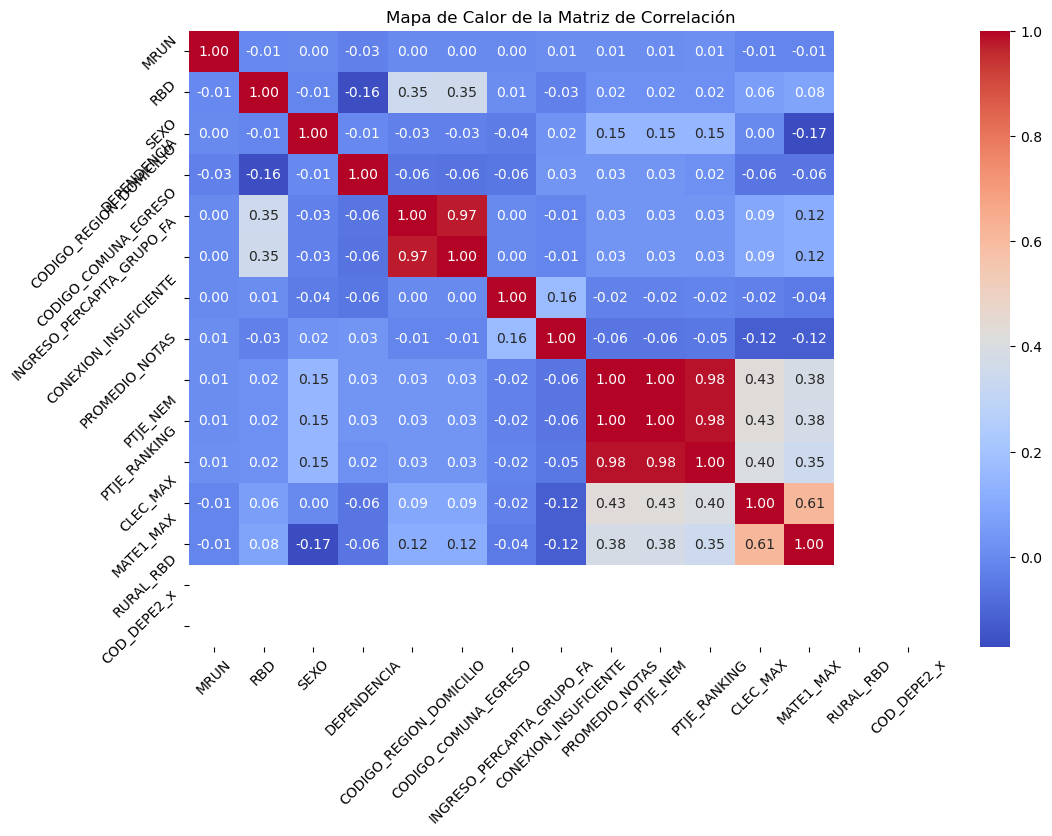

In [271]:
# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_estudiante_municipales.corr(), annot=True, fmt=".2f", cmap='coolwarm')

# Título y etiquetas
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Mostrar el gráfico
plt.show()

### *a)

### * Analice el DataFrame `df_estudiantes_part_sub (Subvencionados)` `df_estudiantes_part_priv (Particulares)` mostrando lo siguiente:
- Un `heatmap` que muestra la correlación entre las diferentes variables numéricas. ¿Cuáles son las variables que parecen más correlacionadas (positiva y negativamente).

# 1*. ¿Existe una relación entre el tipo de establecimiento educacional y el puntaje ponderado de la PAES? ¿En las pruebas obligatorias, se observan diferencias?

### a) Ocupe Histogramas para visualizar las distribuciones de las notas y puntajes PAES (PONDERADO, MATEMATICA Y LENGUAJE)

C:\Users\alons\AppData\Local\Temp\ipykernel_10736\973282491.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo', y=var, data=df_total, ax=axes[i, len(types)], palette=color_dict)
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\973282491.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo', y=var, data=df_total, ax=axes[i, len(types)], palette=color_dict)
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\973282491.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo', y=var, data=df_total, ax=axes[i, len(types)], 

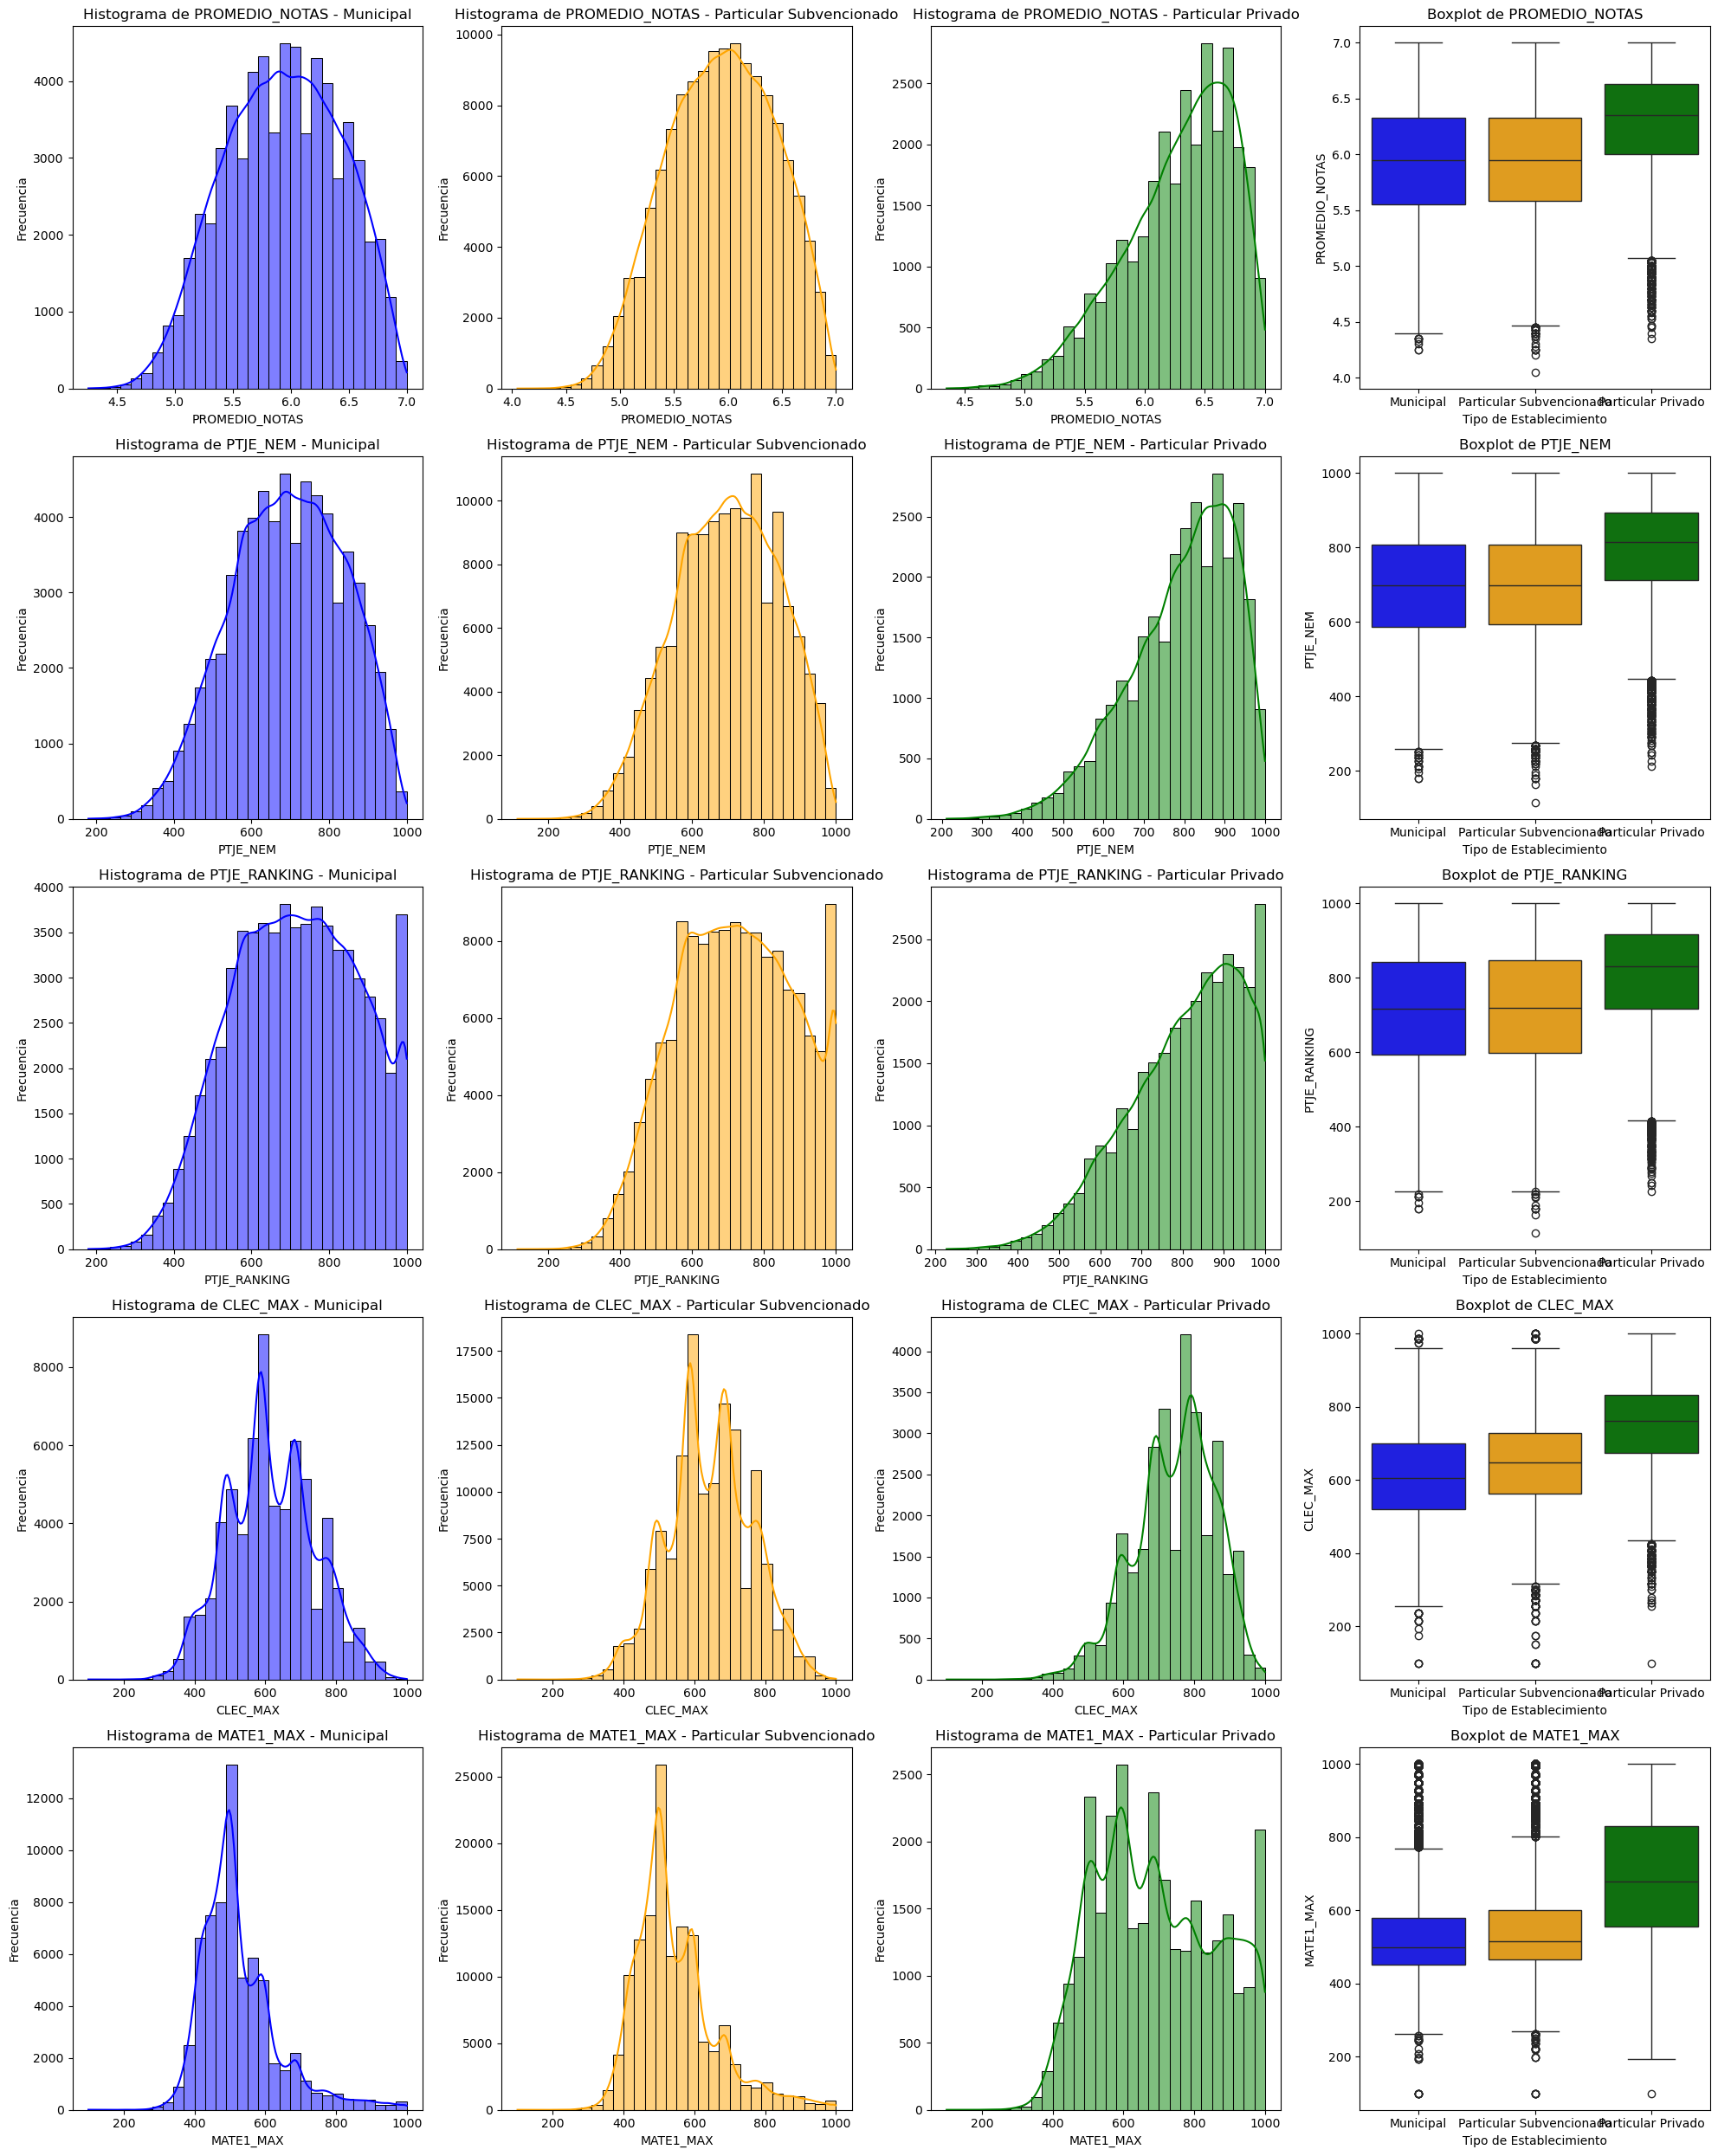

b) Genere una descrupción con  `describe()` de los datos en relación a los puntajes ponderados, de matemática(MATE1_MAX) y lenguaje (CLEC_MAX) de los alumnos del dataframe `df_matriculados`, recuerde, eliminar los puntajes que son igual a 0

count        mean         std    min      25%  \
DEPENDENCIA                                                                 
CORPORACION                1911.0  648.934788   83.203020  407.8  591.075   
GRATUITO                  27112.0  687.010230   90.542995  347.6  625.200   
PARTICULAR                18668.0  769.869026  102.693421  407.4  695.600   
PARTICULAR SUBVENCIONADO  58409.0  689.729948   93.602026  359.6  624.100   

                              50%       75%     max  
DEPENDENCIA                                          
CORPORACION               647.800  706.5750  919.70  
GRATUITO                  682.775  748.1125  982.60  
PARTICULAR                777.250  852.0625  994.95  
PARTICULAR SUBVENCIONADO  685.300  753.4000  972.50

count        mean         std    min    25%  \
DEPENDENCIA                                                               
CORPORACION                1911.0  652.553637   95.281001  386.0  582.0   
GRATUITO                  27112.0  681.689658  104.912256  301.0  596.0   
PARTICULAR                18668.0  773.508732  100.308455  317.0  701.0   
PARTICULAR SUBVENCIONADO  58409.0  696.419439  101.626459  301.0  619.0   

                            50%    75%     max  
DEPENDENCIA                                     
CORPORACION               649.0  714.0   987.0  
GRATUITO                  683.0  761.0  1000.0  
PARTICULAR                788.0  853.0  1000.0  
PARTICULAR SUBVENCIONADO  692.0  775.0  1000.0

count        mean         std    min    25%  \
DEPENDENCIA                                                               
CORPORACION                1911.0  545.504971   91.653170  318.0  480.0   
GRATUITO                  27112.0  574.969755  122.847044  286.0  491.0   
PARTICULAR                18668.0  734.505732  162.623805  289.0  601.0   
PARTICULAR SUBVENCIONADO  58409.0  591.806297  124.853935  243.0  499.0   

                            50%    75%     max  
DEPENDENCIA                                     
CORPORACION               526.0  595.0  1000.0  
GRATUITO                  554.0  631.0  1000.0  
PARTICULAR                728.0  877.0  1000.0  
PARTICULAR SUBVENCIONADO  567.0  659.0  1000.0

Al ver los puntajes de admision podemos notar que los establecimientos pagados obtienen un puntaje bastante mas alto que los otros tipos de establecimiento, de tal forma que el 75% de los estudiantes de establecimientos pagados obtienen un puntaje ponderado mayor a 695. Incluso el 75% de los estudiantes de establecimientos municipales obtienen un puntaje ponderado menor a 700, cuando la mitad de los estudiantes de establecimientos pagados obtienen un puntaje mayor a 700.

### c) Ahora mediante boxplots represente visualmente la informacion que acaba de obtener mediante la funcion ` describe()`

C:\Users\alons\AppData\Local\Temp\ipykernel_10736\3197187855.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="DEPENDENCIA", y="CLEC_MAX", data=est_clec, showfliers=False, palette=palette)
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\3197187855.py:19: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x="DEPENDENCIA", y="CLEC_MAX", data=est_clec, showfliers=False, palette=palette)


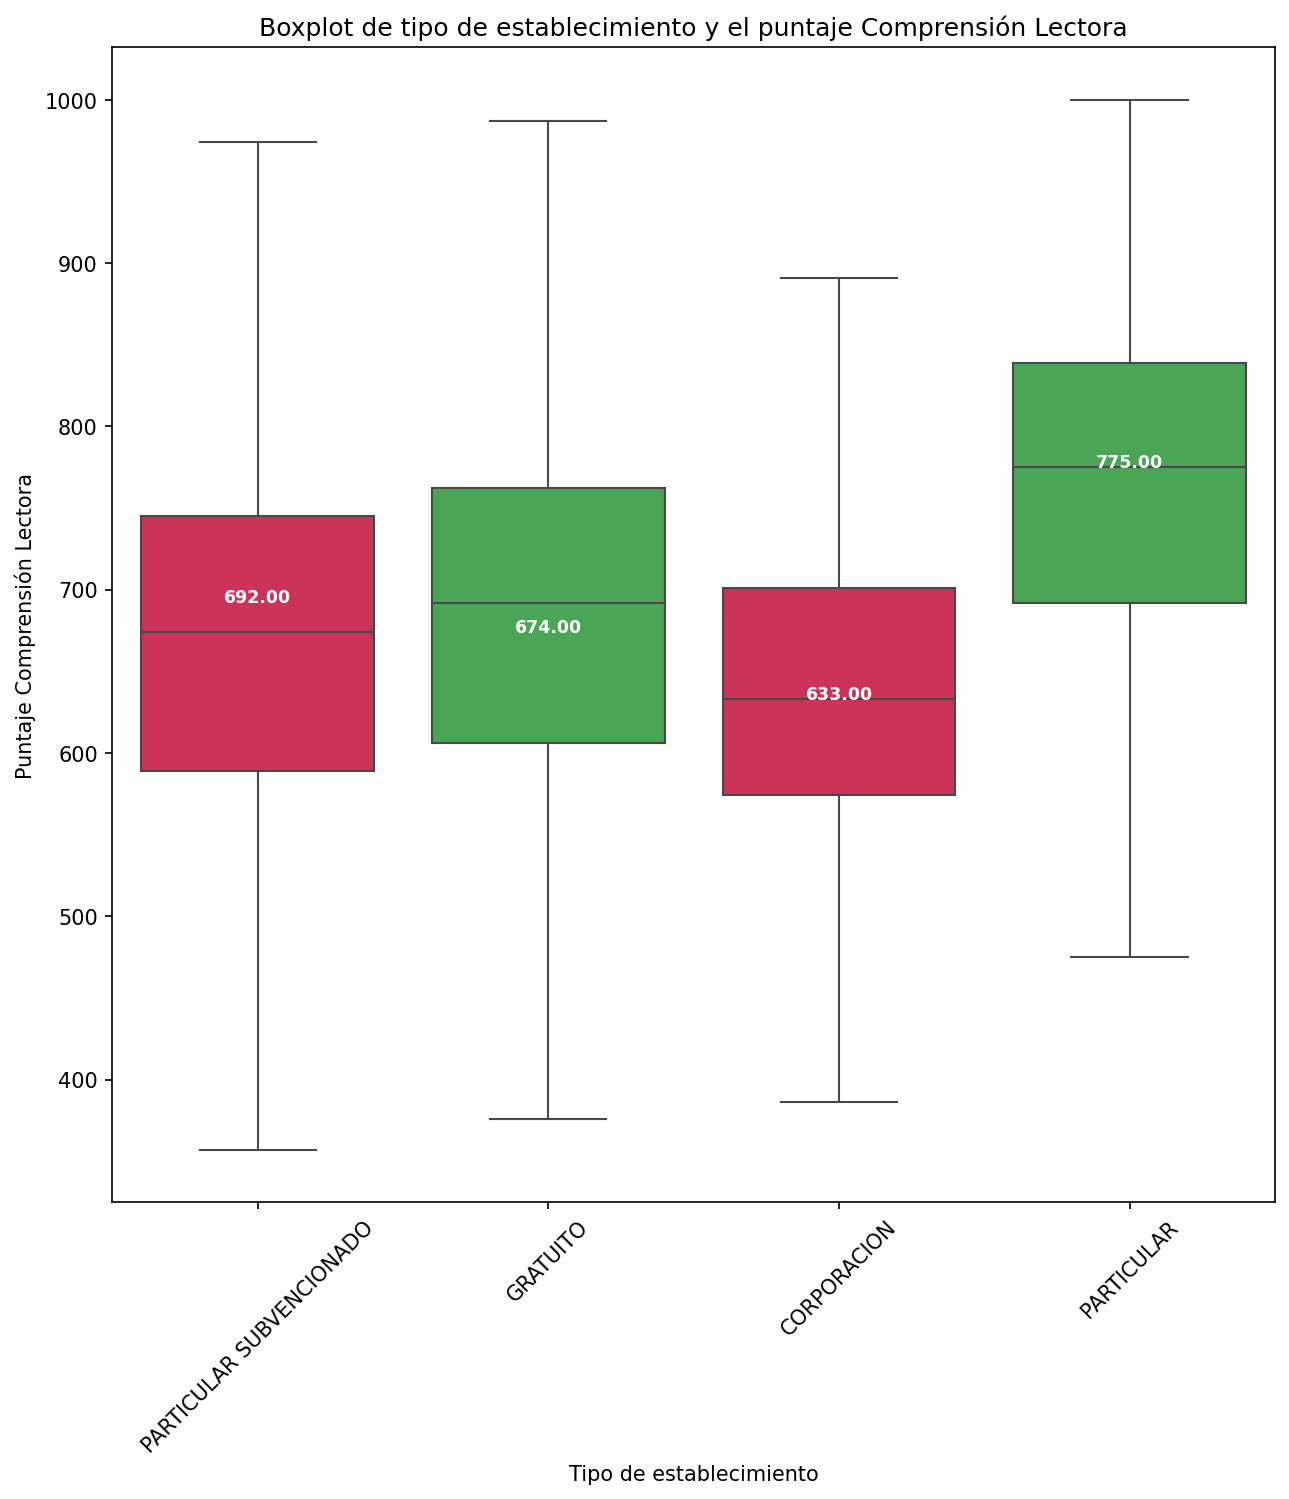

C:\Users\alons\AppData\Local\Temp\ipykernel_10736\2191909038.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="DEPENDENCIA", y="MATE1_MAX", data=est_ponderado, showfliers=False, palette=palette)
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\2191909038.py:7: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.boxplot(x="DEPENDENCIA", y="MATE1_MAX", data=est_ponderado, showfliers=False, palette=palette)


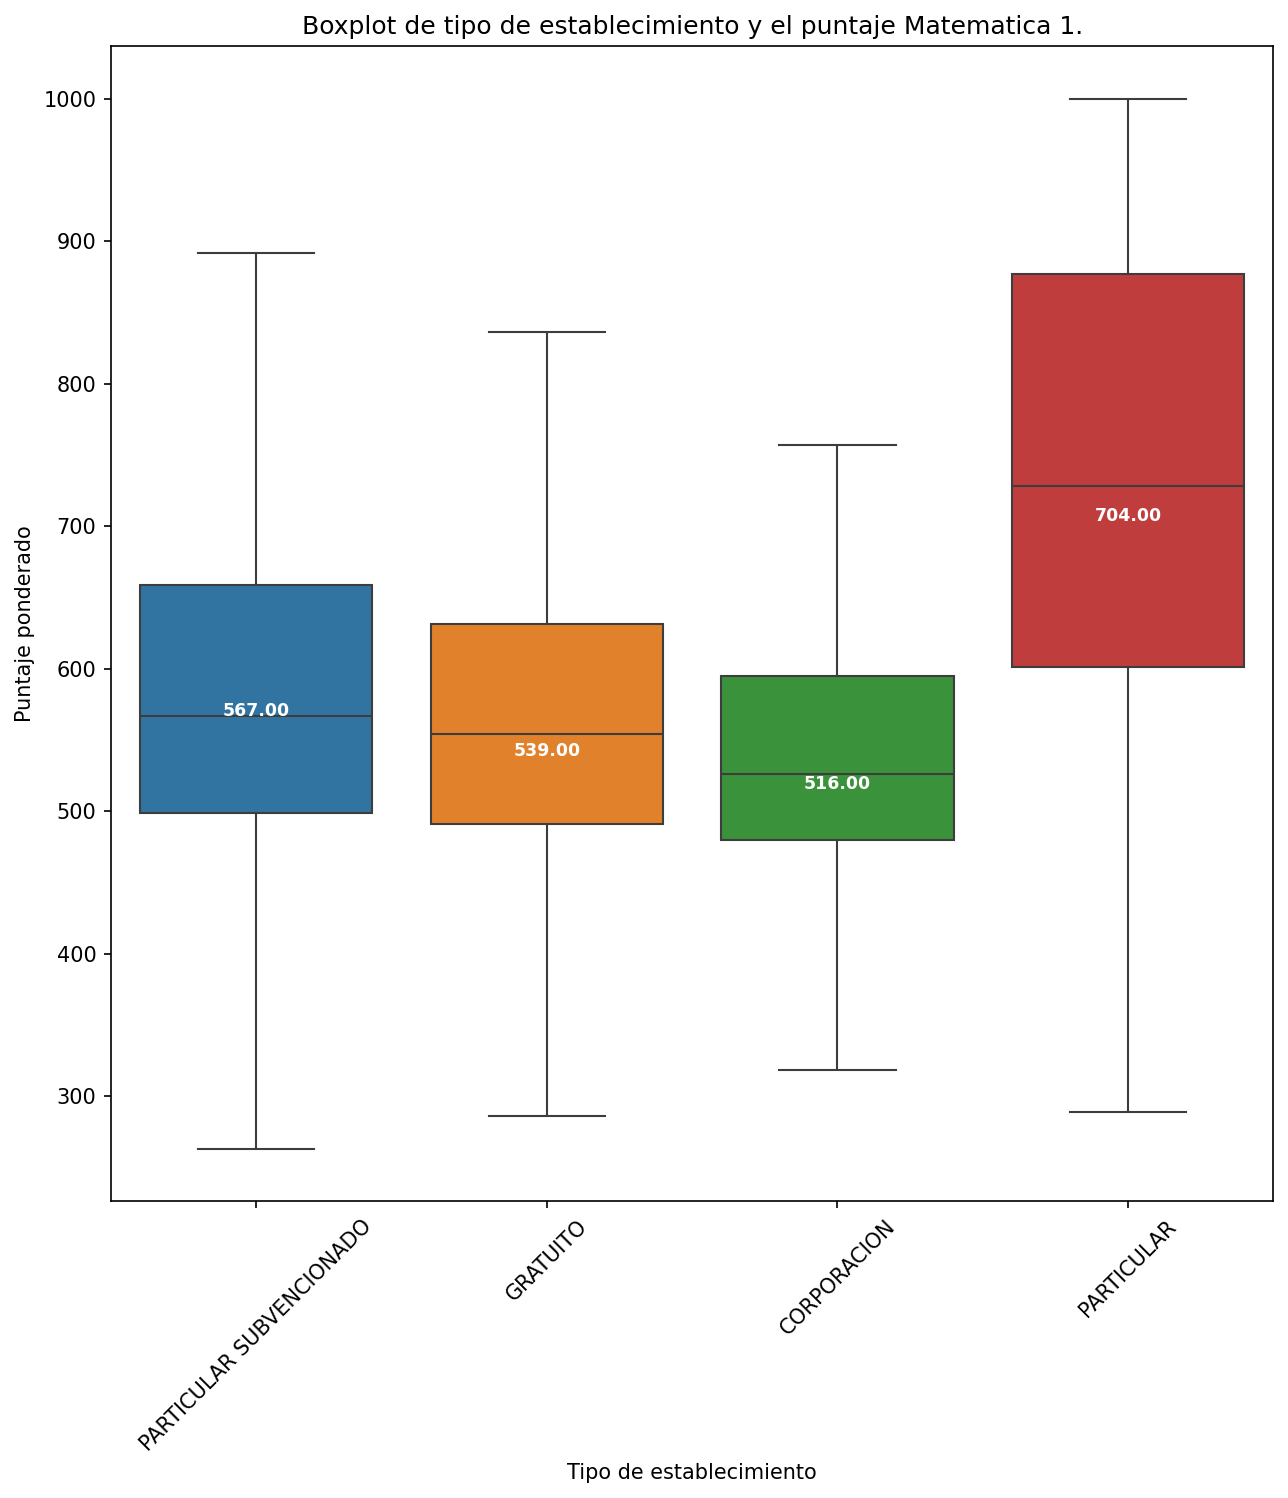

In [278]:

plt.show()

### d) Represente en un mismo gráfico los puntajes ponderado, clec_mx y mate1_max

C:\Users\alons\AppData\Local\Temp\ipykernel_10736\3881653543.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEPENDENCIA", y=var, data=est_ponderado, ax=axes[i], showfliers=False, palette=palette)
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\3881653543.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(orden, rotation=45)
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\3881653543.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEPENDENCIA", y=var, data=est_ponderado, ax=axes[i], showfliers=False, palette=palette)
C:\Users\alons\AppData\Local\Temp\ipykernel_10

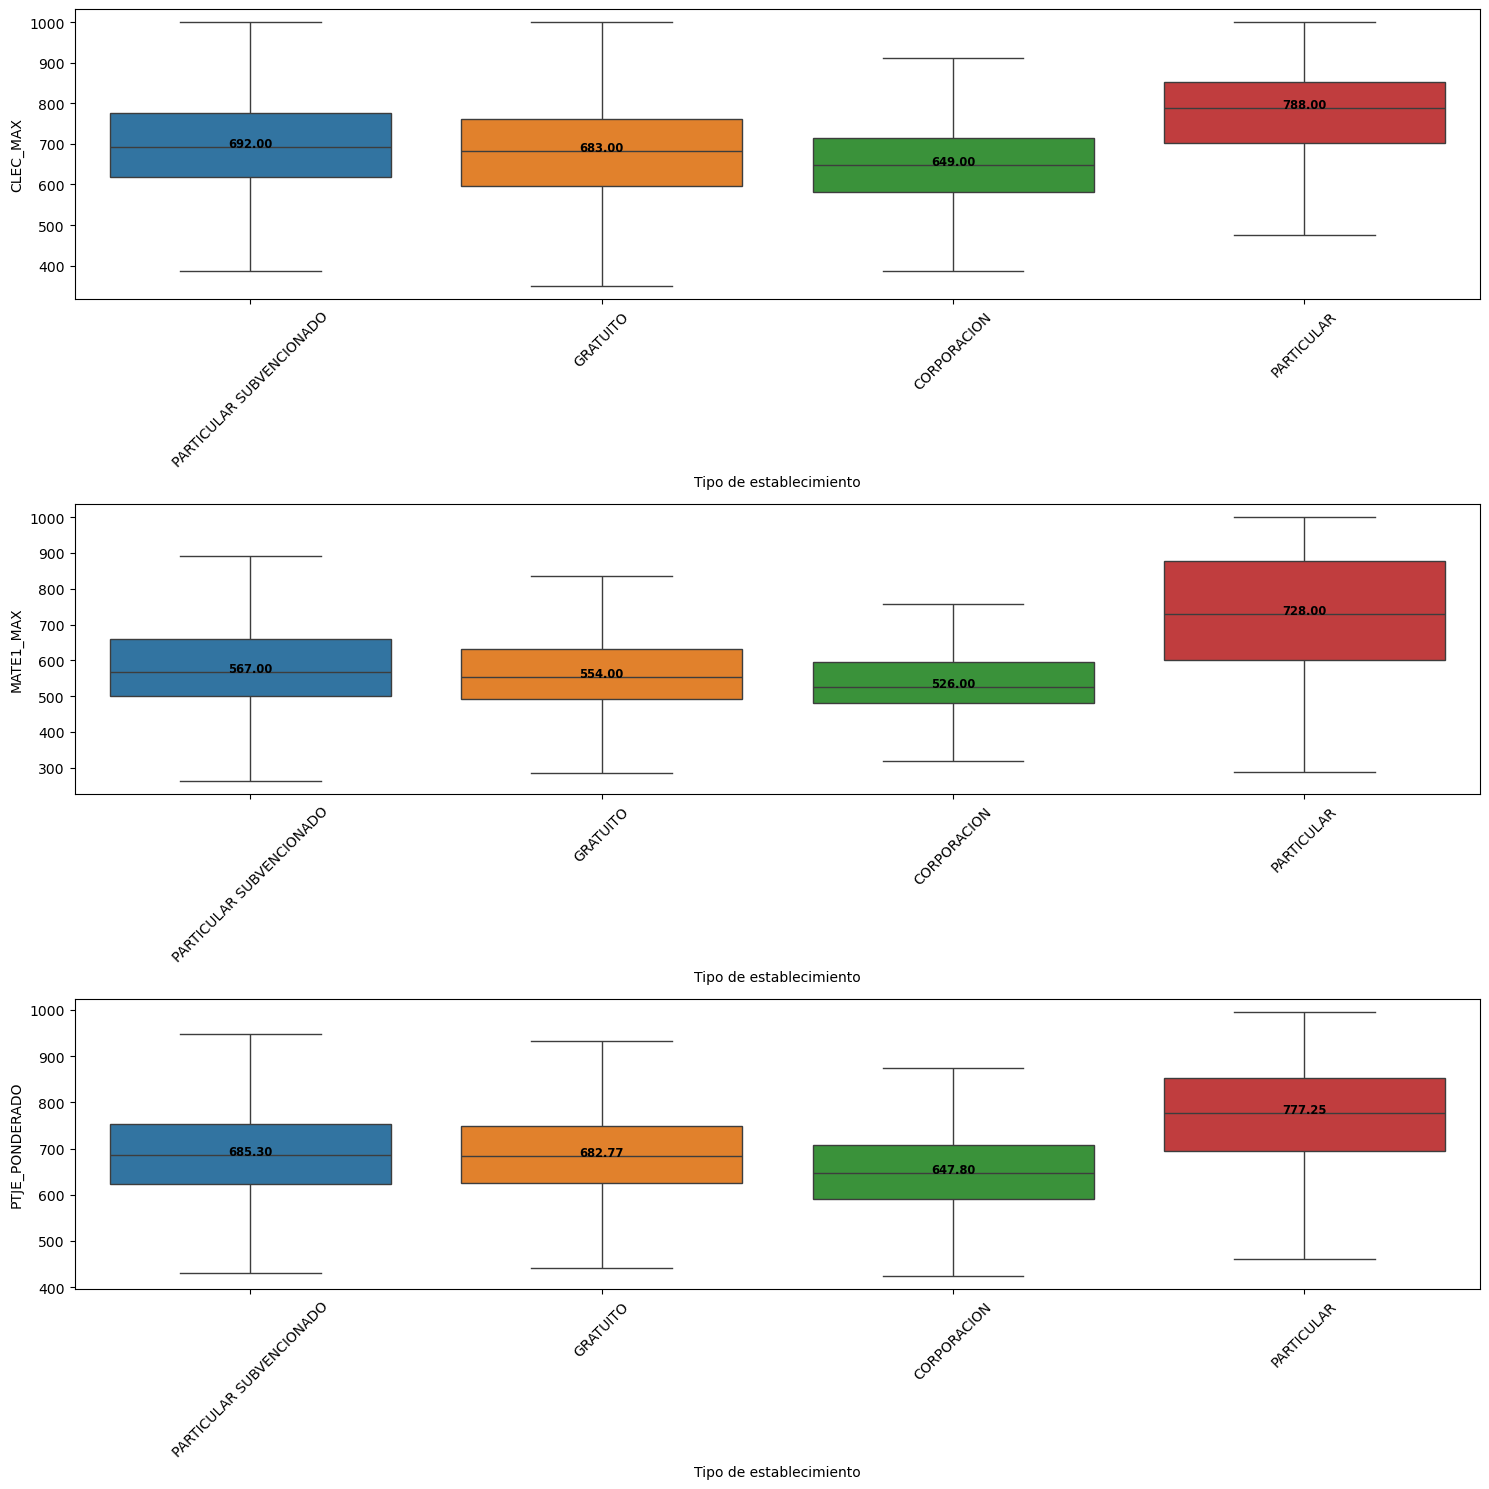

Al la final si existe una relacion entre el tipo de establecimiento al que asiste el estudiante y el puntaje ponderado de la PAES, y esta relacion es bastante fuerte. Notemos que la brecha es bastante pronunciana, y durante el proceso de admision una pequeña diferencia en el puntaje puede significar la diferencia entre entrar a una universidad o no.

#### 2. ¿Existen diferencia entre el ingreso familiar y el puntaje de admisión? ¿En las pruebas obligatorias, se observan diferencias?

a) Determine si existe algun patrón en relacion al ingreso familiar y el puntaje de admisión 

Para este igualmente usaremos boxplot, para ver como se distribuyen los puntajes de admision segun el ingreso familiar. Para esto se usara la variable `INGRESO_PERCAPITA_GRUPO_FA` que corresponde a la categoria de deciles de ingresos per cápita familiar, y la variable `PUNTAJE_PONDERADO` que corresponde al puntaje ponderado de admision.

In [281]:
ing_ponderado = df_matriculados.query("PTJE_PONDERADO != 0 and DEPENDENCIA != 'NO INFO' & INGRESO_PERCAPITA_GRUPO_FA != 99")
palette = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", 
           "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", 
           "#008080", "#e6beff", "#9a6324", "#fffac8", "#800000", 
           "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", 
           "#ffffff", "#000000"]

In [282]:
ing_ponderado

MRUN  SEXO               DEPENDENCIA  CODIGO_REGION_DOMICILIO  \
5        4750494     2  PARTICULAR SUBVENCIONADO                       13   
6       21862866     2                  GRATUITO                        5   
7       19692080     2                  GRATUITO                        6   
8       11565214     1               CORPORACION                       13   
9       12673265     1  PARTICULAR SUBVENCIONADO                        4   
...          ...   ...                       ...                      ...   
123881  27125002     2                PARTICULAR                       13   
123883  27125516     2  PARTICULAR SUBVENCIONADO                       10   
123884  26525702     2  PARTICULAR SUBVENCIONADO                       10   
123886  26526755     1                  GRATUITO                       13   
123887  26526614     1                  GRATUITO                       16   

        CODIGO_COMUNA_EGRESO  INGRESO_PERCAPITA_GRUPO_FA  PROMEDIO_NOTAS  \
5                      13127                           2            5.50   
6                       5109                           2            6.05   
7                       6101                           1            6.27   
8                      13119                           3            5.68   
9                       4101                           1            6.70   
...                      ...                         ...             ...   
123881                 13113                           8            6.73   
123883                 10301                           2            5.85   
123884                 10101                           5            5.90   
123886                 13106                           1            5.23   
123887                 16302                           8            6.30   

        PTJE_NEM  PTJE_RANKING  CLEC_MAX  MATE1_MAX  PTJE_PONDERADO  \
5            577           577       606        452          565.85   
6            727           761       791        588          724.70   
7            793           993       606        491          697.60   
8            623           657       729        601          722.00   
9            915           985       674        715          756.95   
...          ...           ...       ...        ...             ...   
123881       922           967       790        743          791.50   
123883       672           704       551        480          591.45   
123884       685           713       617        452          580.50   
123886       488           491       633        757          593.40   
123887       799           850       596        499          677.30   

                 NOMBRE_INSTITUCION  VIA_ADMISION  
5       UNIVERSIDAD ALBERTO HURTADO             1  
6       UNIVERSIDAD DE LAS AMÉRICAS             1  
7          UNIVERSIDAD DE O'HIGGINS             1  
8       UNIVERSIDAD ALBERTO HURTADO             1  
9          UNIVERSIDAD DE LA SERENA             1  
...                             ...           ...  
123881         UNIVERSIDAD DE CHILE             1  
123883     UNIVERSIDAD DE LOS LAGOS             1  
123884    UNIVERSIDAD SAN SEBASTIAN             1  
123886          UNIVERSIDAD CENTRAL             1  
123887      UNIVERSIDAD DEL BIO-BIO             1  

[79918 rows x 14 columns]

C:\Users\alons\AppData\Local\Temp\ipykernel_10736\454029082.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_1 = sns.boxplot(x="INGRESO_PERCAPITA_GRUPO_FA", y="PTJE_PONDERADO", data=ing_ponderado, showfliers=False, palette=palette)
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\454029082.py:8: UserWarning: The palette list has more values (22) than needed (10), which may not be intended.
  ax_1 = sns.boxplot(x="INGRESO_PERCAPITA_GRUPO_FA", y="PTJE_PONDERADO", data=ing_ponderado, showfliers=False, palette=palette)


Text(0, 0.5, 'Puntaje ponderado')

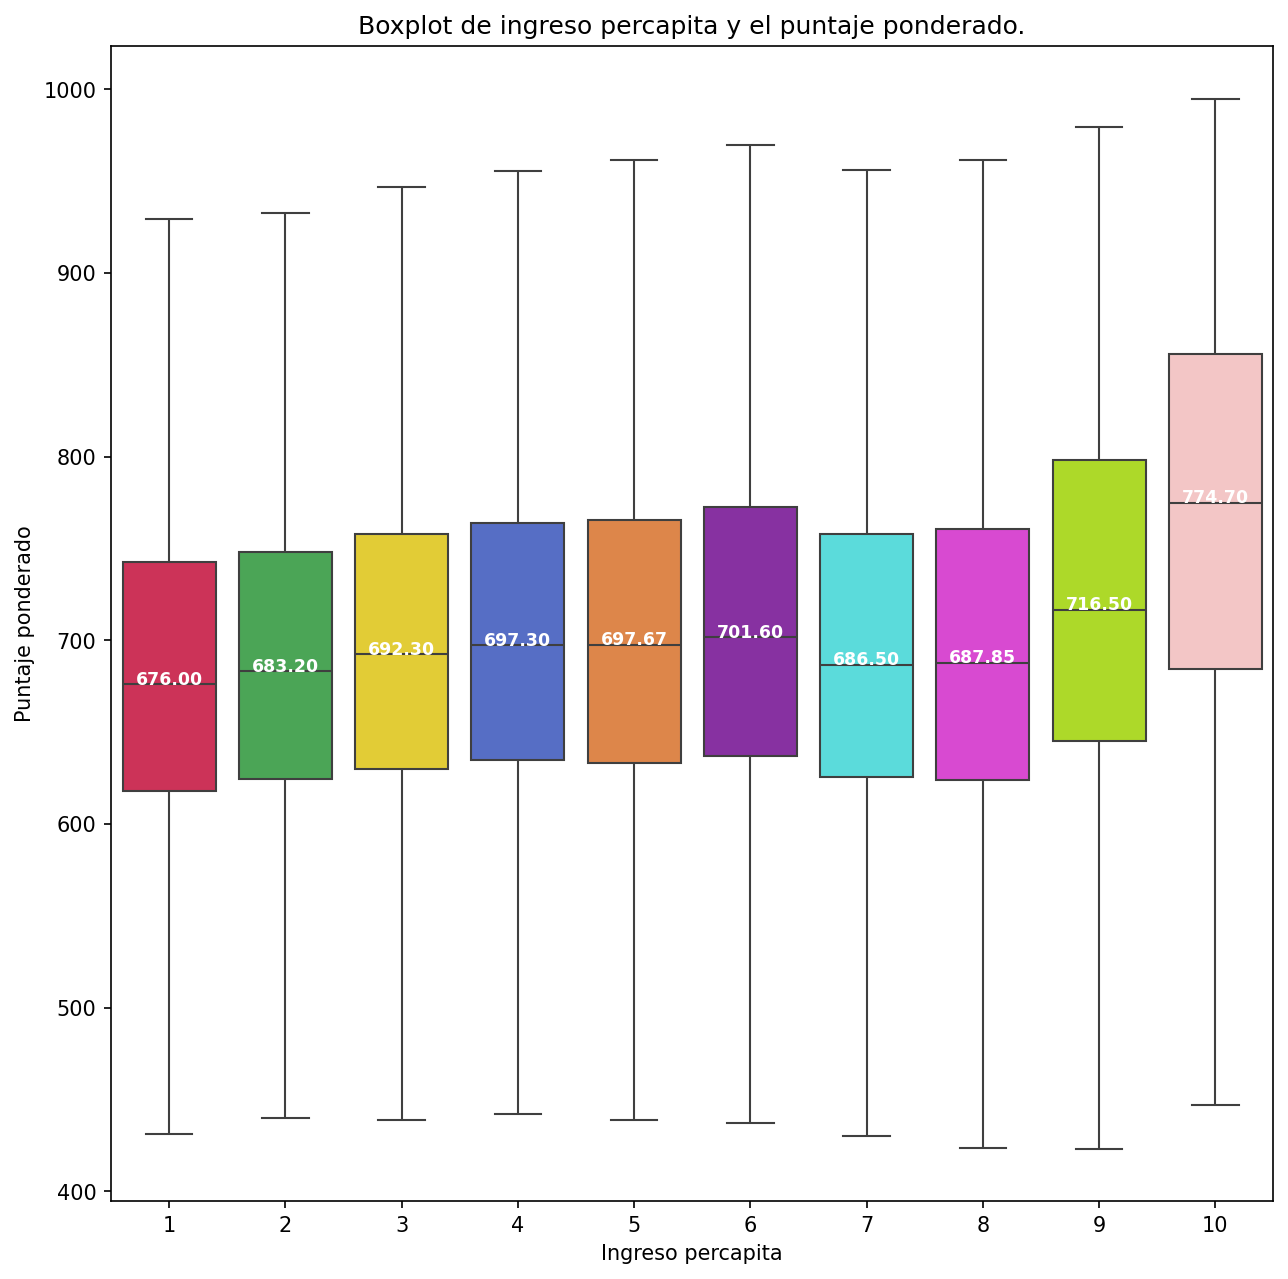

Obtenemos que un ingreso familiar en promedio asegura un un mejor puntaje de admsion, esto se puede deber a que al tener mejores ingresos uno puede matricularse a un colegio de mejor calidad, o incluso tiene los recursos para pagar un preuniversitario. Sin embargo, la diferencia no es tan grande, y se puede ver que incluso los estudiantes con un ingreso familiar bajo pueden obtener un buen puntaje de admision.

# *Visualizar a traves de un GPD

#### 3. ¿Como se distribuyen los promedios de las pruebas obligatorias de la PAES en un mapa de Chile (nivel nacional)? ¿Existen diferencias entre las regiones? ¿En el caso de existir diferencias, estas se pueden explicar por factores socioeconómicos? ¿El problema de la educación chilena es algo generalizado en las regiones?

Para lo anterior veremos como se distribuyen los puntajes de la prueba de Comprension Lectora y Matematica 1, en las distintas regiones de Chile. Para este proposito usaremos un mapa de Chile, y usaremos la libreria `geopandas` para graficar los datos.

a) En el dataframe df_comunas se encuentra el geopandas respectivo de cada region, para poder realizar la visualizacion correspondiente, ocupe este dataframe para realizar como se distribuyen  los puntajes de las pruebas obligatorias de los colegios a lo largo de Chile.

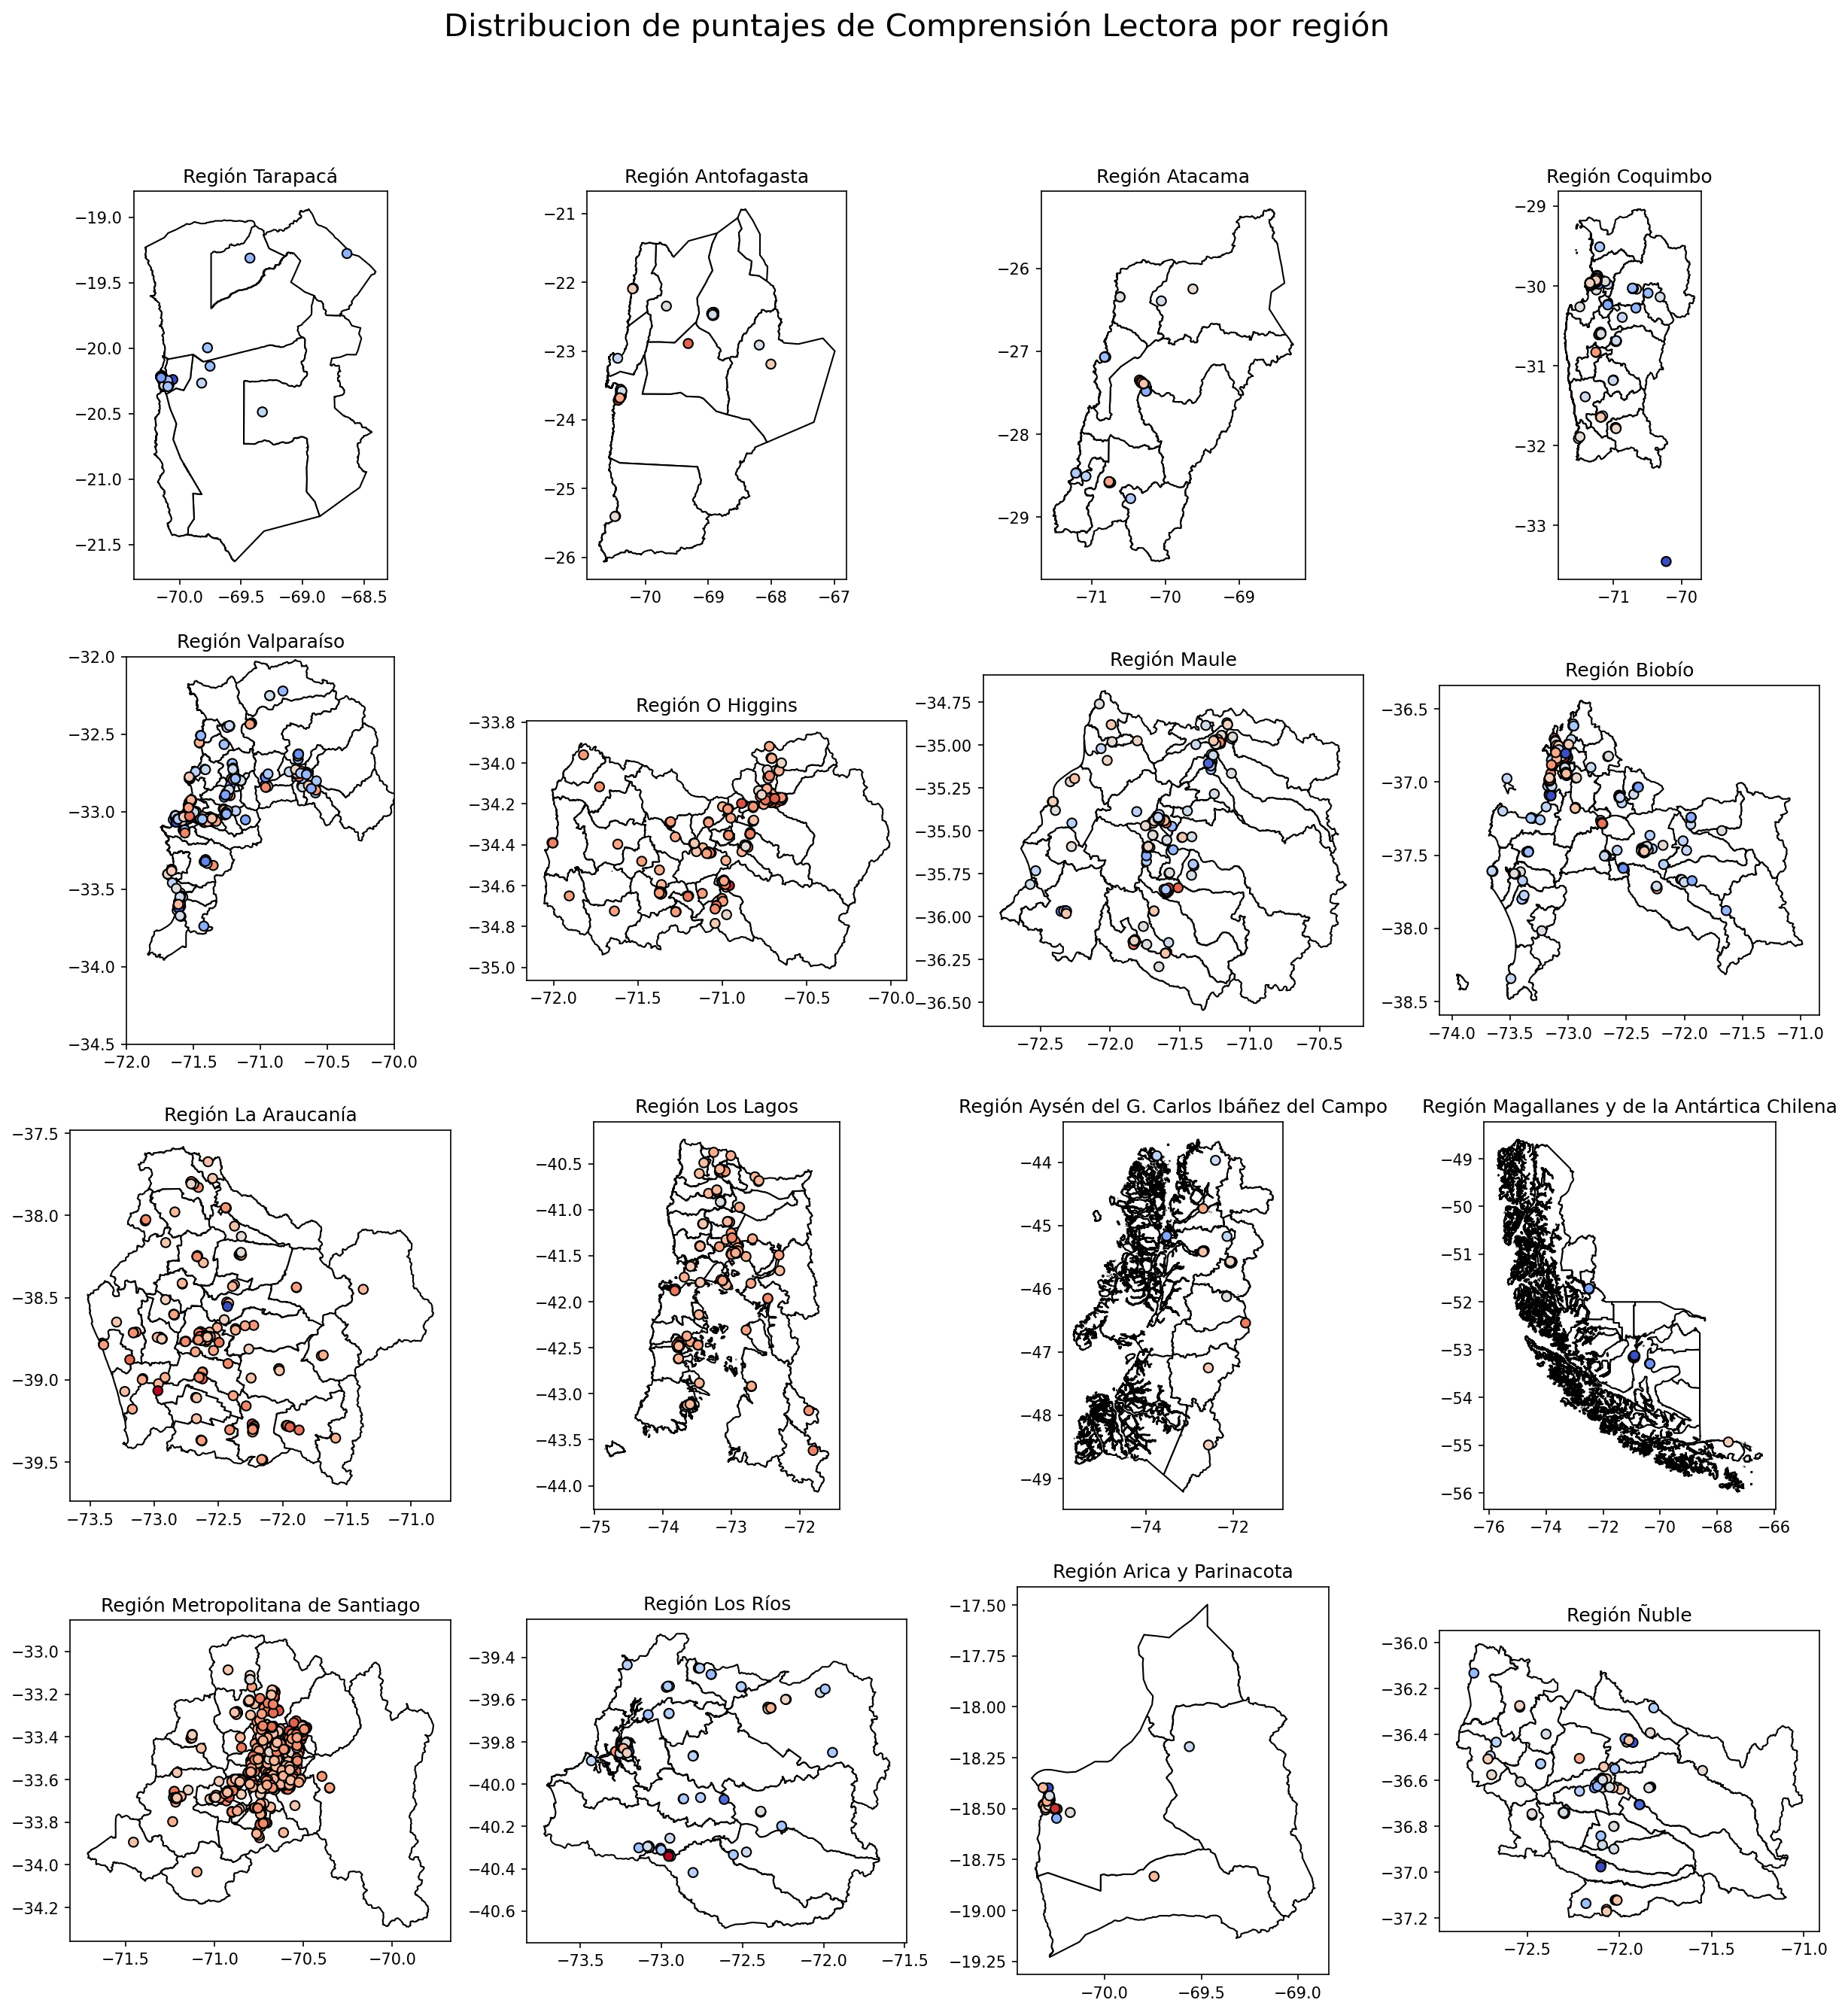

Como estamos usando `coolwarm`, mientras mas rojo sea este es cercano a 1000, pero al caso contrario es mas azul. 

Al ver los mapas podemos ver en primera instancia que entre regiones existe bastante diferencia entre regiones, la primera gran diferencia es la cantidad de establecimientos de alumnos inscritos para el proceso de rendicion de la PAES, donde la region metropolitana es la que tiene mas establecimientos inscritos, y la region de Magallanes es la que tiene menos establecimientos inscritos. Incluso dentro de la misma region metropolina existen diferencias en la cantidad de establecimientos educaciones, ya que Santiago centro posee mas establecimientos que la prefiera de Santiago.

Otro punto importante es que multiples regiones se puede observar que existen puntos que son mas rojos que otros, y en cambio a los alrededores son mas azules, esto se puede deber a que los establecimientos de buena calidad se encuentran en las ciudades, y los establecimientos de mala calidad se encuentran en las afueras de las ciudades o en zonas rurales.

Este fenomeno a su vez se debe a condiciones socioeconomicas, ya que los establecimientos apartados de las grandes ciudades poseen meno

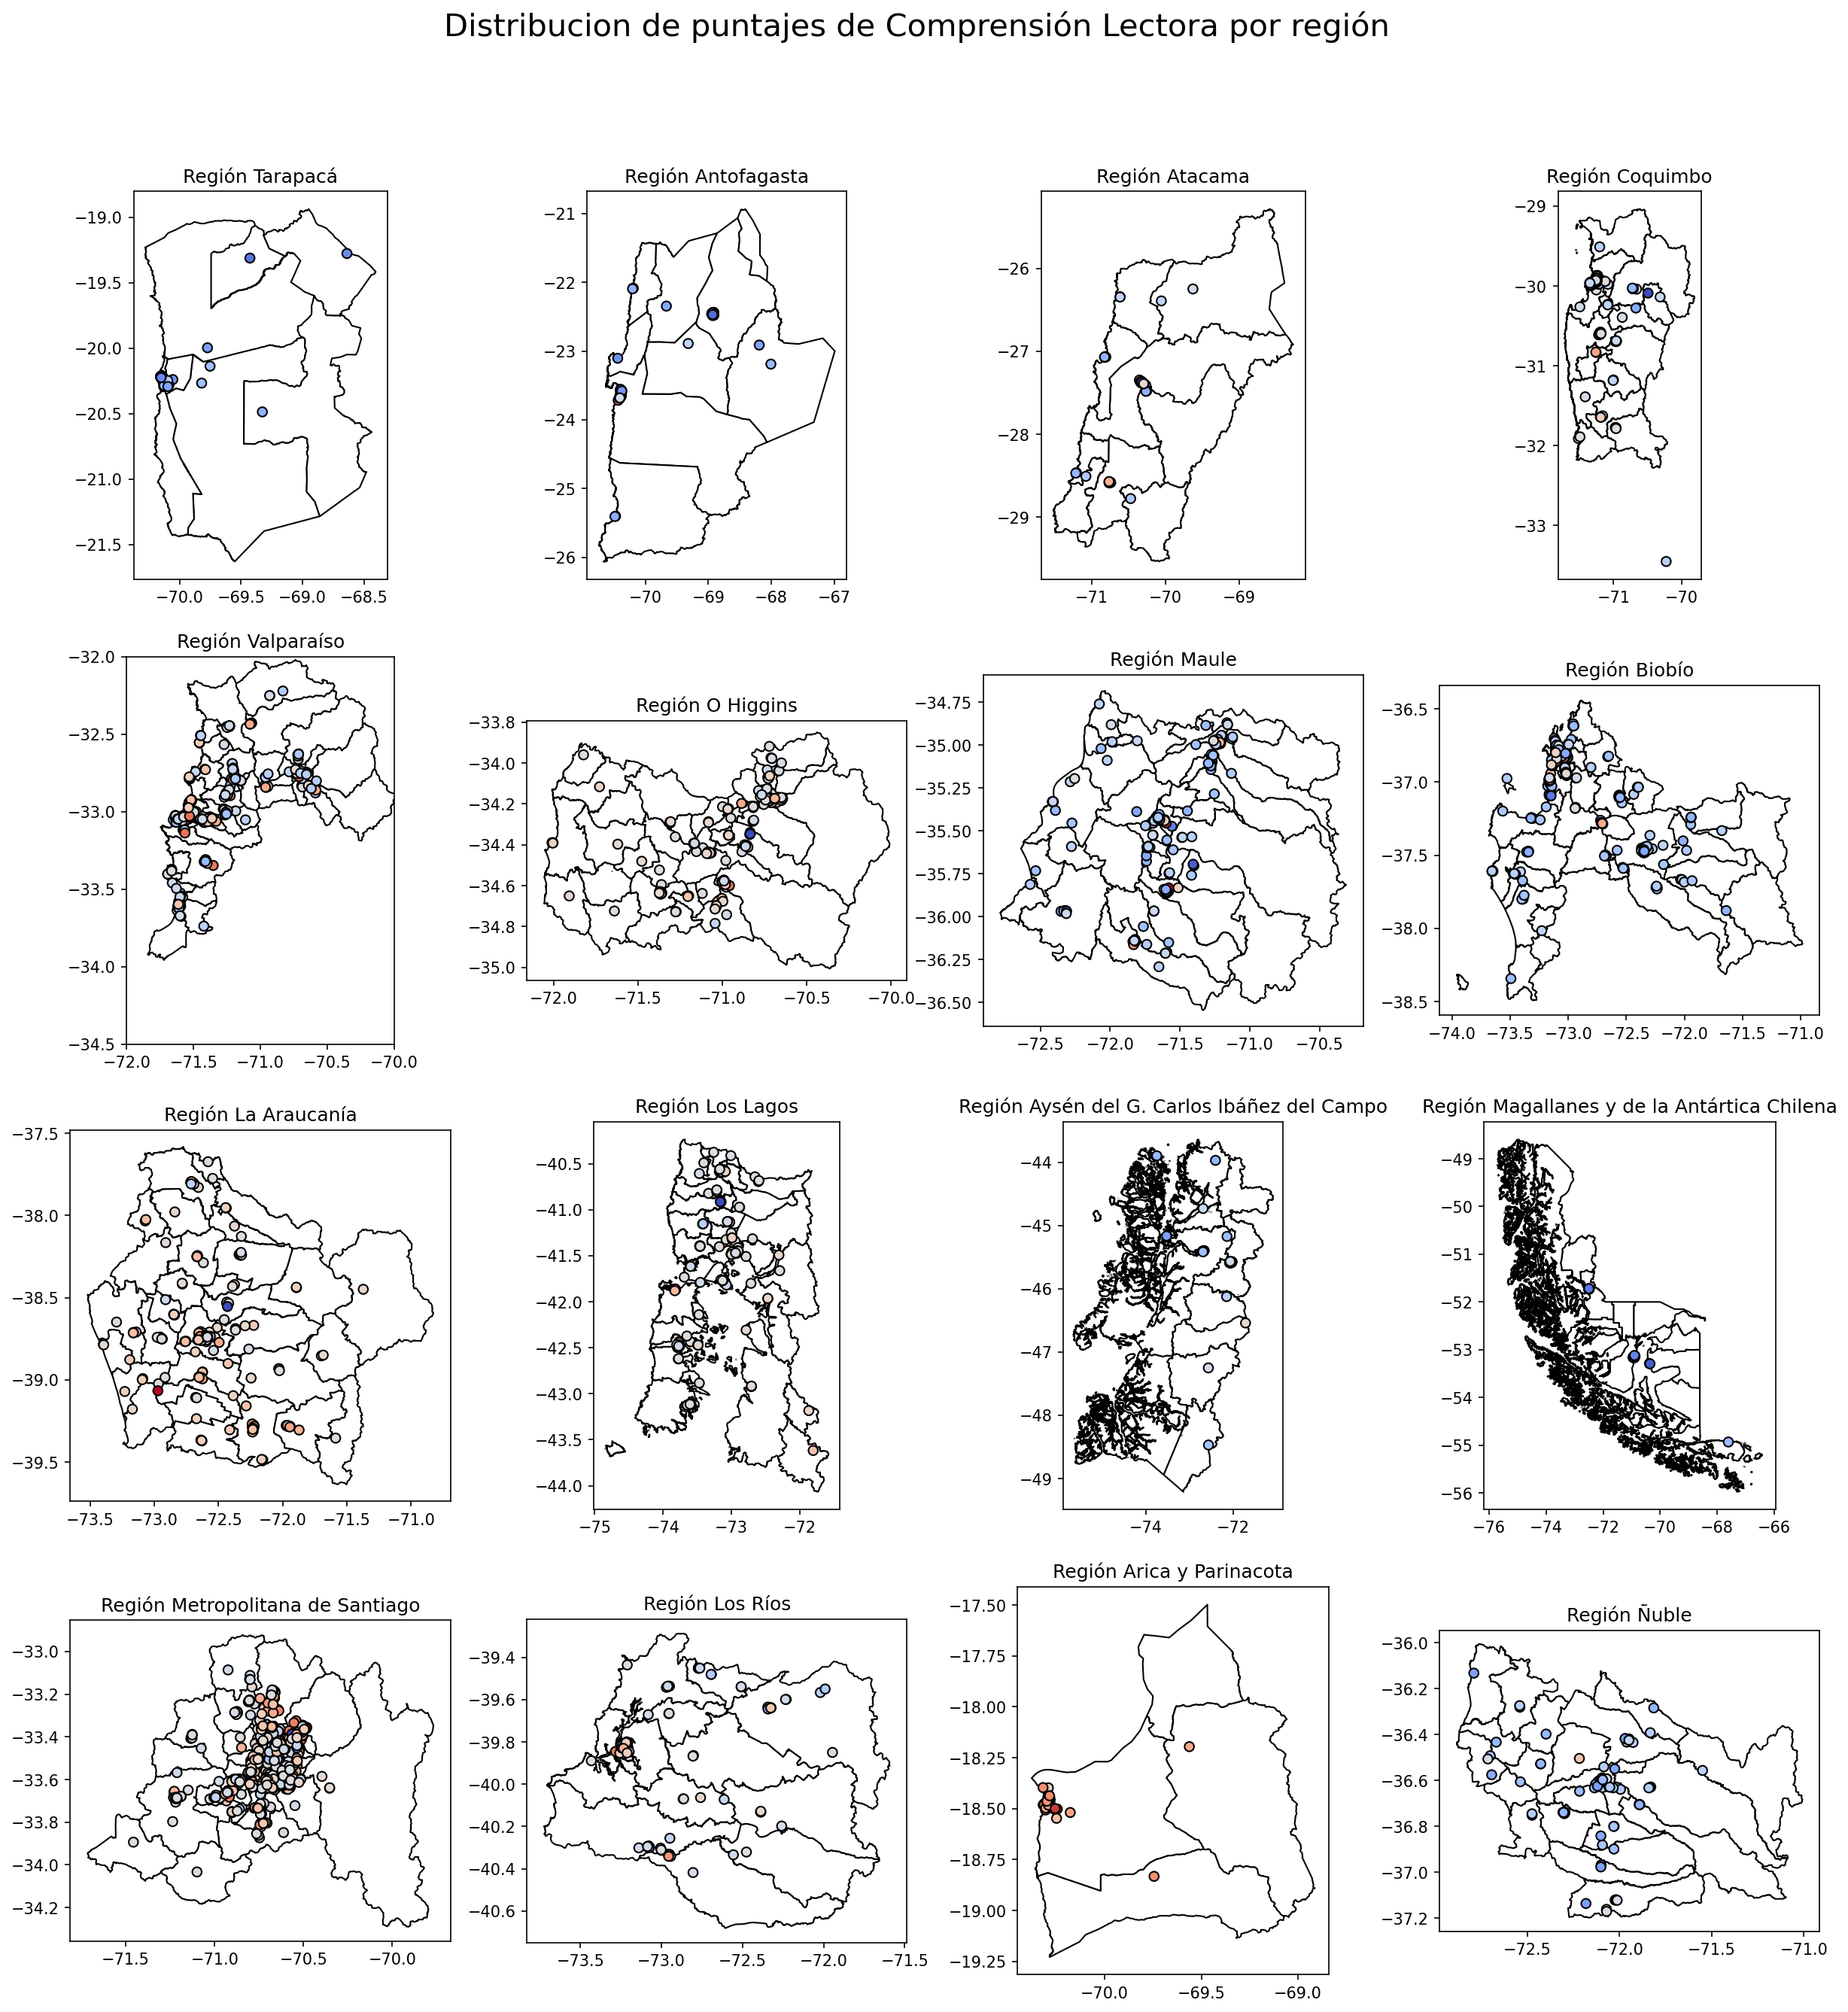

#### 4. ¿Existen diferencias en los puntajes de admisión entre géneros? ¿En qué áreas son más pronunciadas?

C:\Users\alons\AppData\Local\Temp\ipykernel_10736\2926123917.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_region['SEXO'] = data_region['SEXO'].astype('category')
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\2926123917.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SEXO', y='CLEC_MAX', data=data_region, ax=axs[row, col],
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\2926123917.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to 

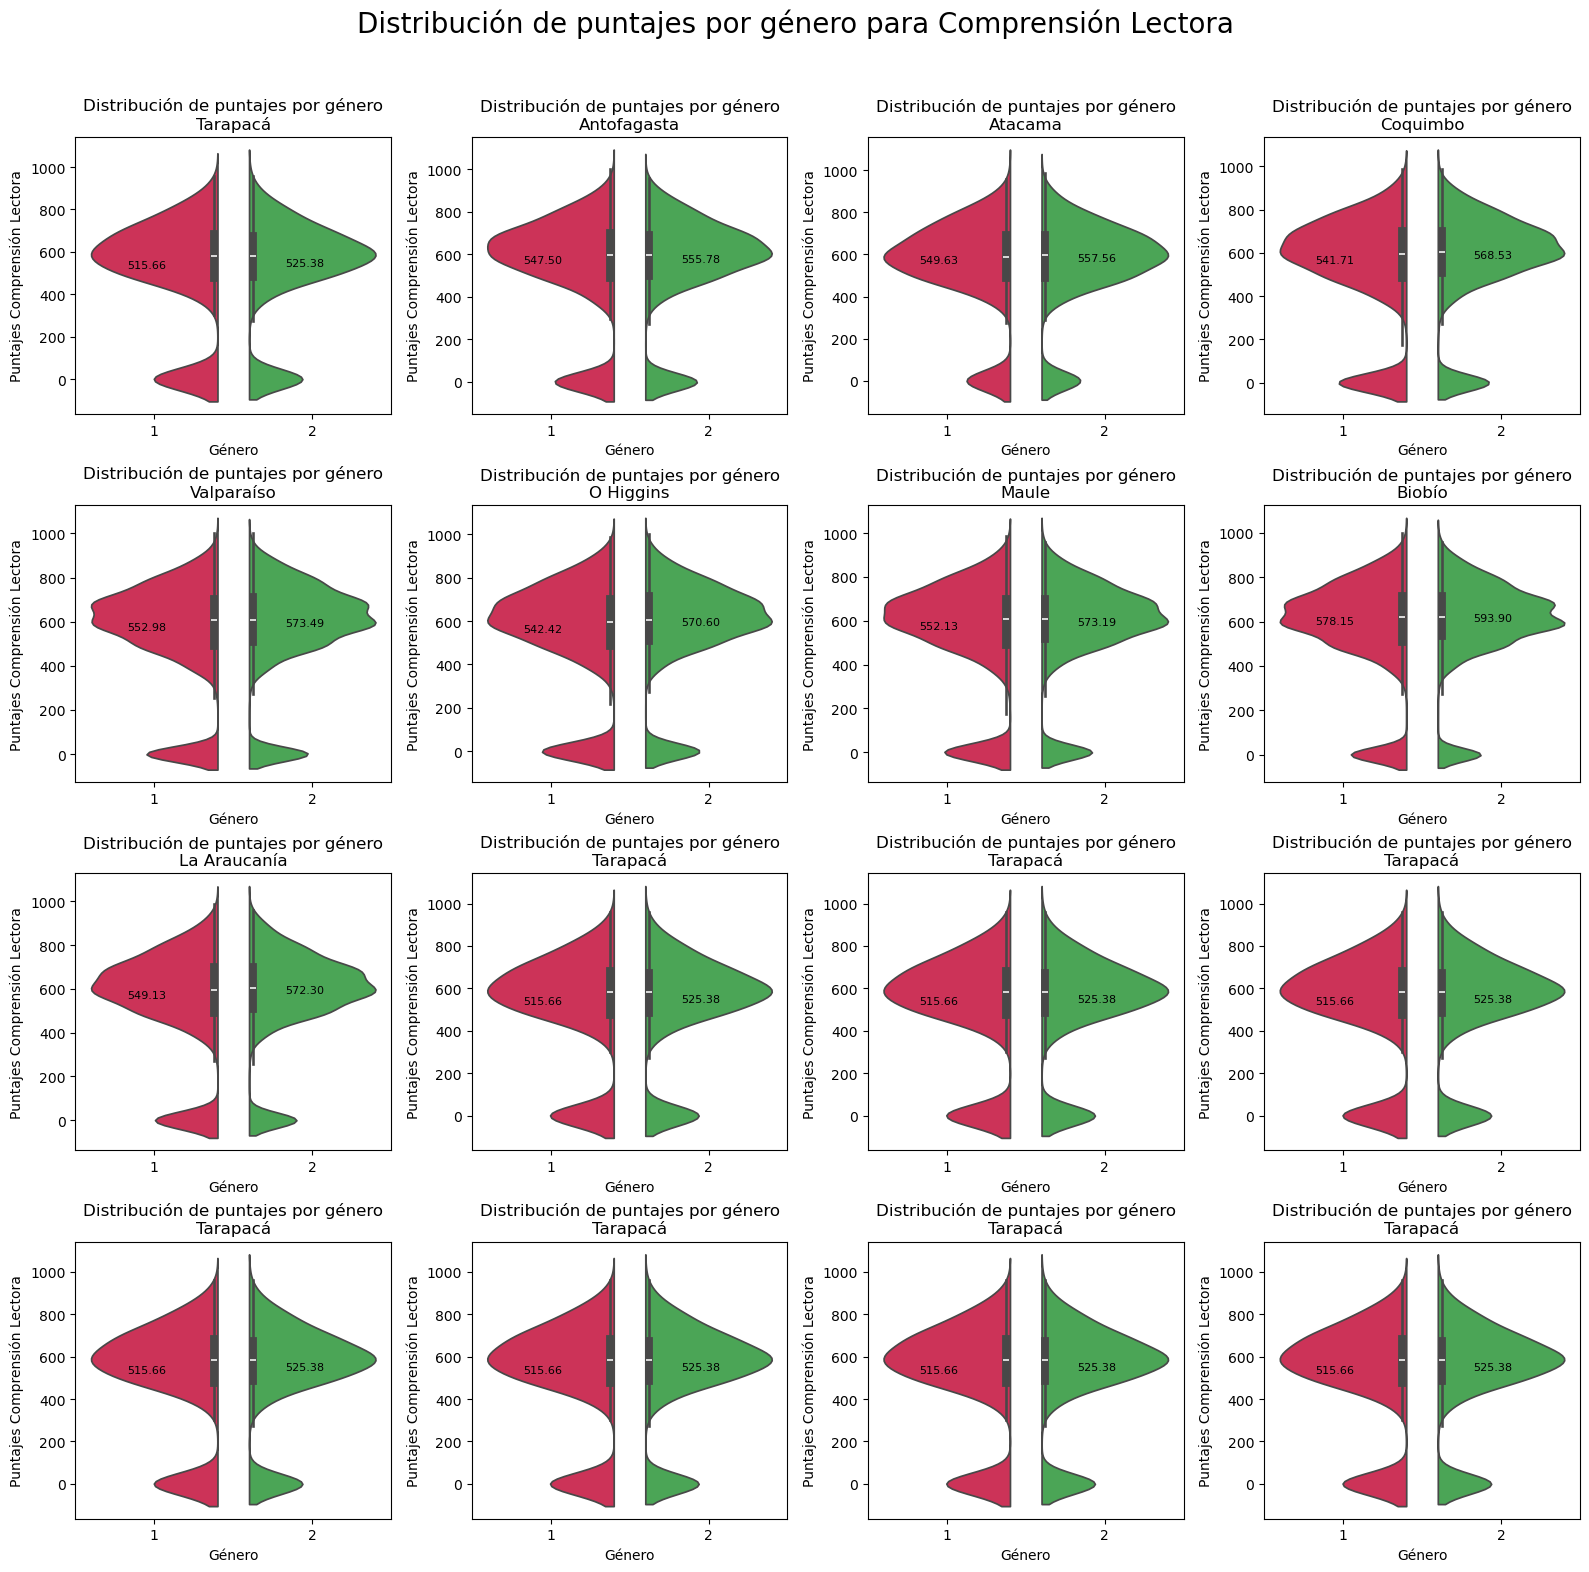

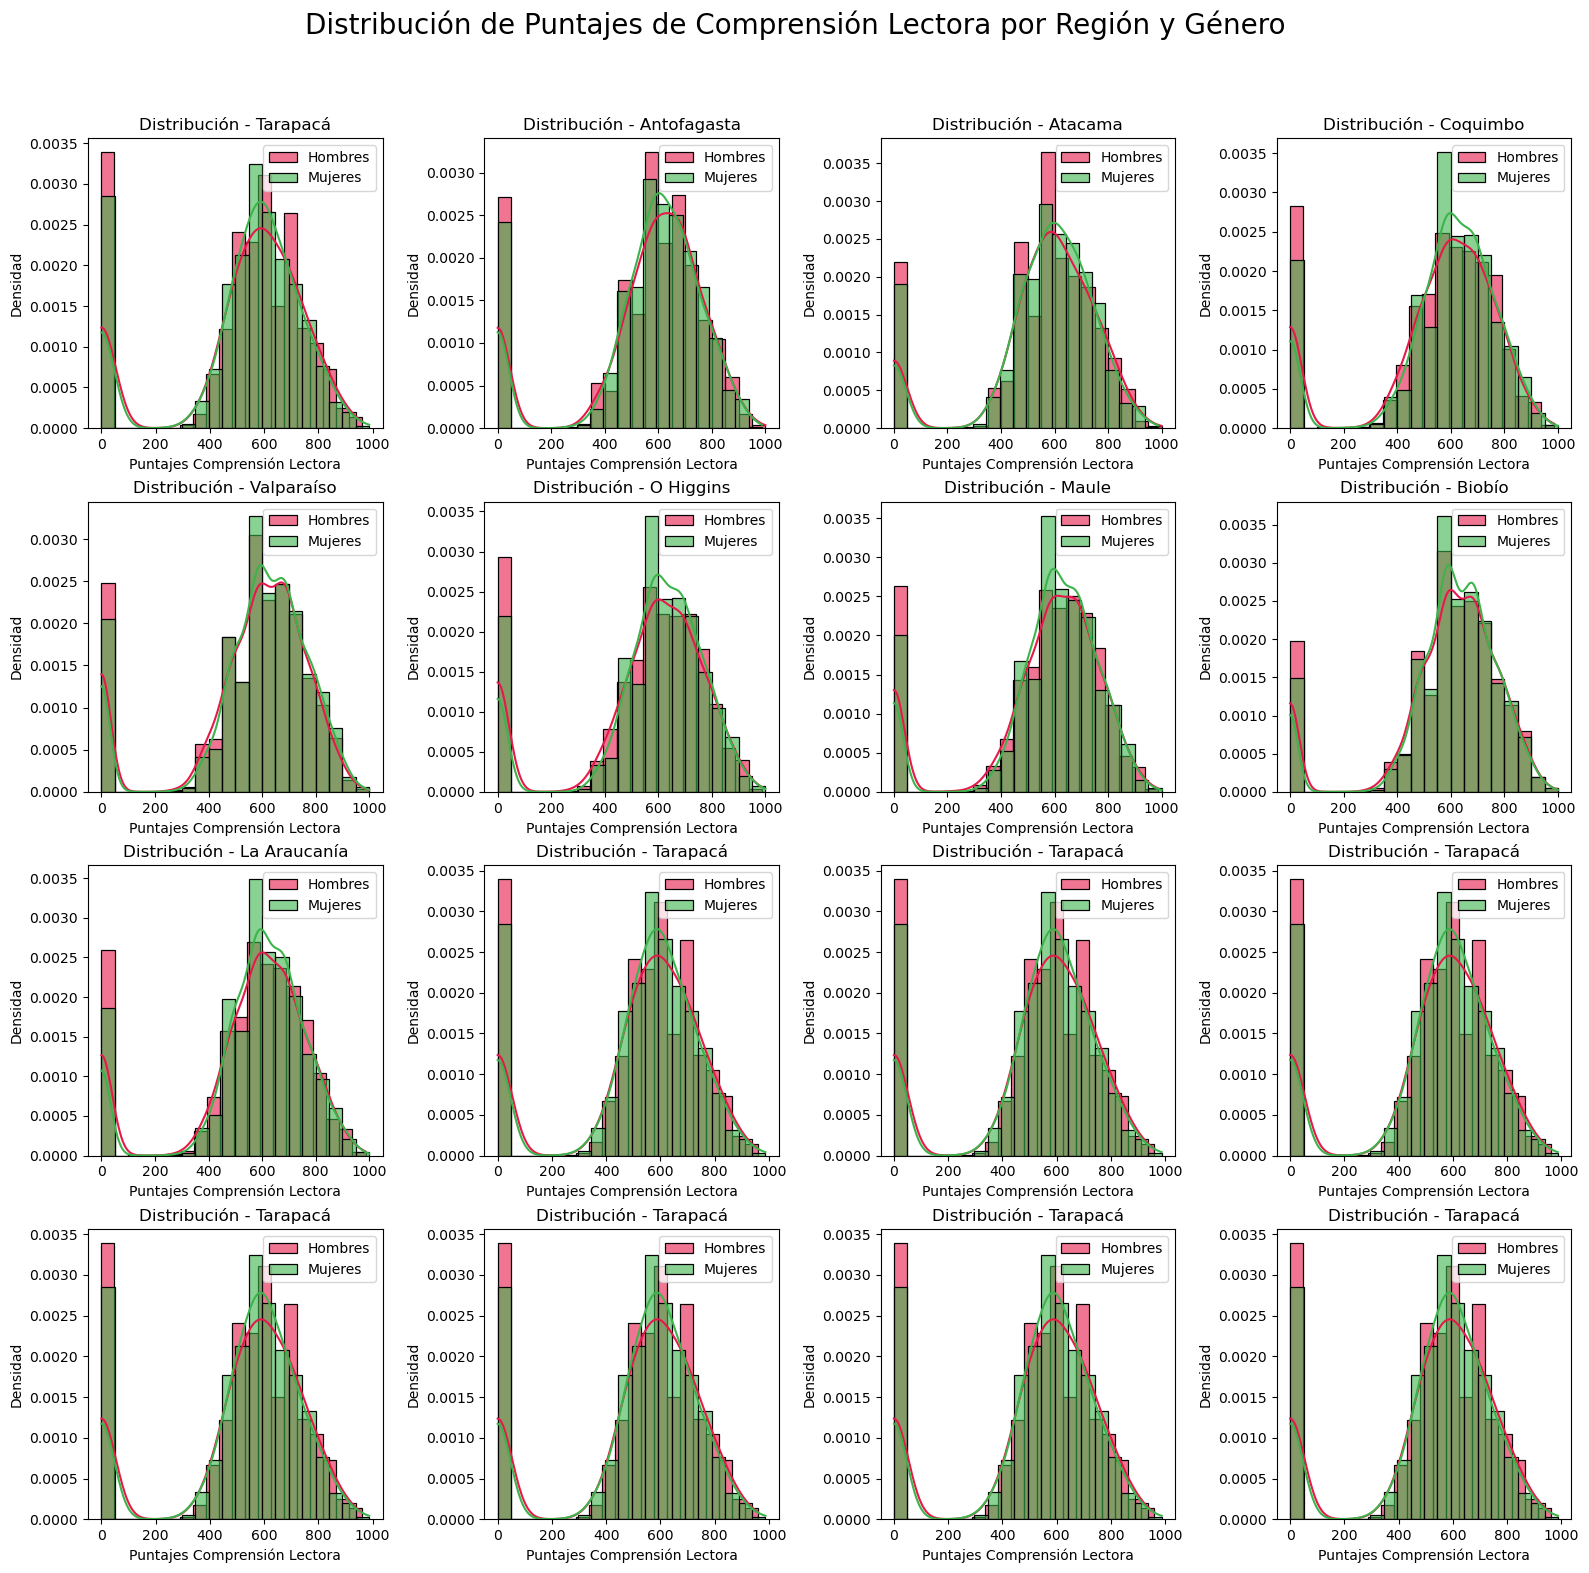

C:\Users\alons\AppData\Local\Temp\ipykernel_10736\3554182561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SEXO', y='MATE1_MAX', data=data_region, ax=axs[row, col], palette=palette)
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\3554182561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SEXO', y='MATE1_MAX', data=data_region, ax=axs[row, col], palette=palette)
C:\Users\alons\AppData\Local\Temp\ipykernel_10736\3554182561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SEXO', y='MATE1_MAX', data=data_region, ax=axs

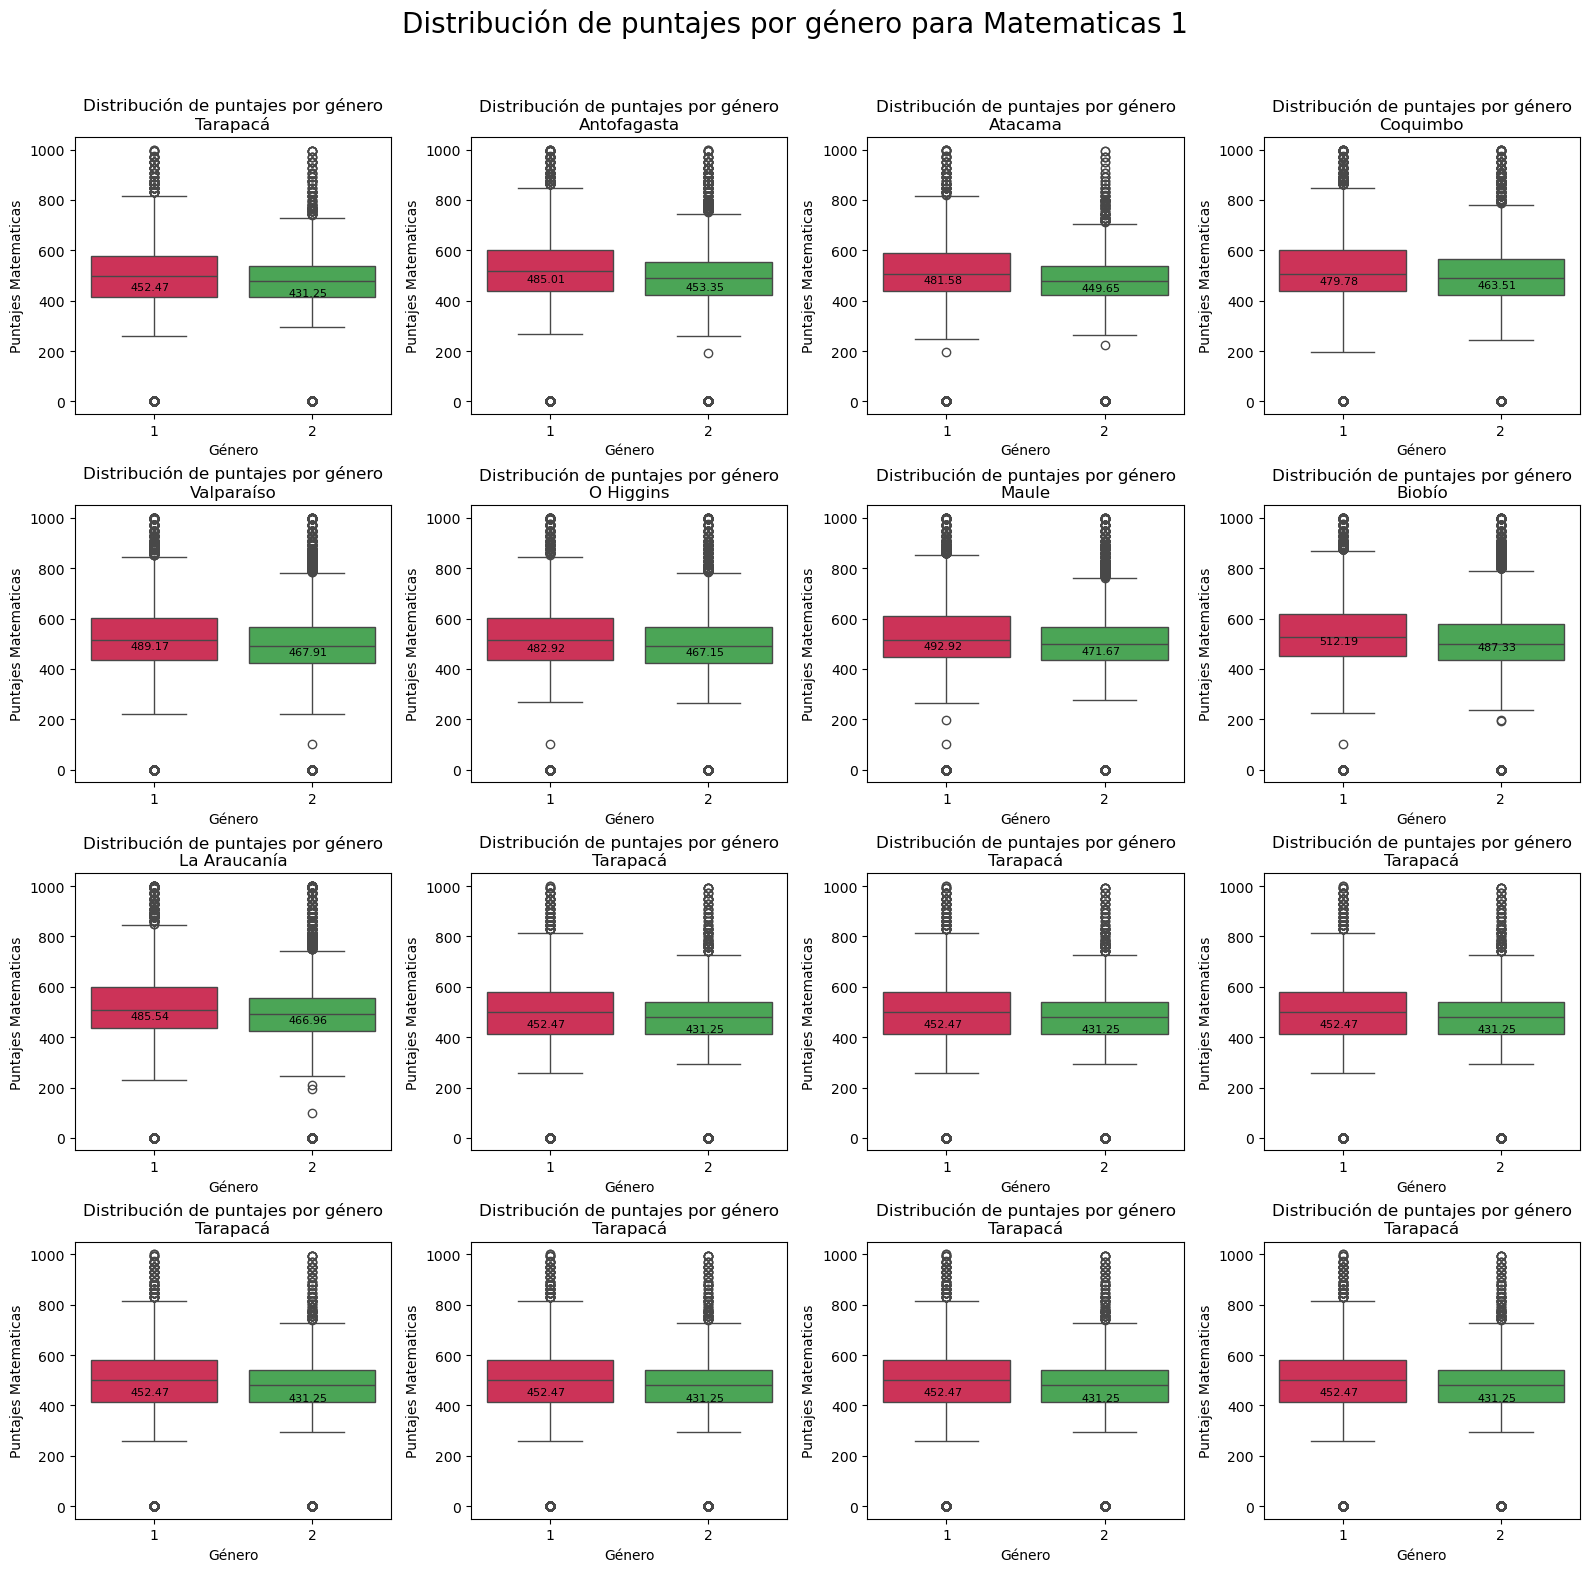

#### 5. ¿Existe una relación entre el promedio de notas en la enseñanza media y los puntajes de admisión?

array(['GRATUITO', 'NO INFO', 'PARTICULAR SUBVENCIONADO', 'CORPORACION',
       'PARTICULAR'], dtype=object)

C:\Users\alons\AppData\Local\Temp\ipykernel_10736\3919402391.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ing_ponderado['REGION'] = ing_ponderado['CODIGO_REGION_DOMICILIO'].apply(lambda x: region_names[x-1])


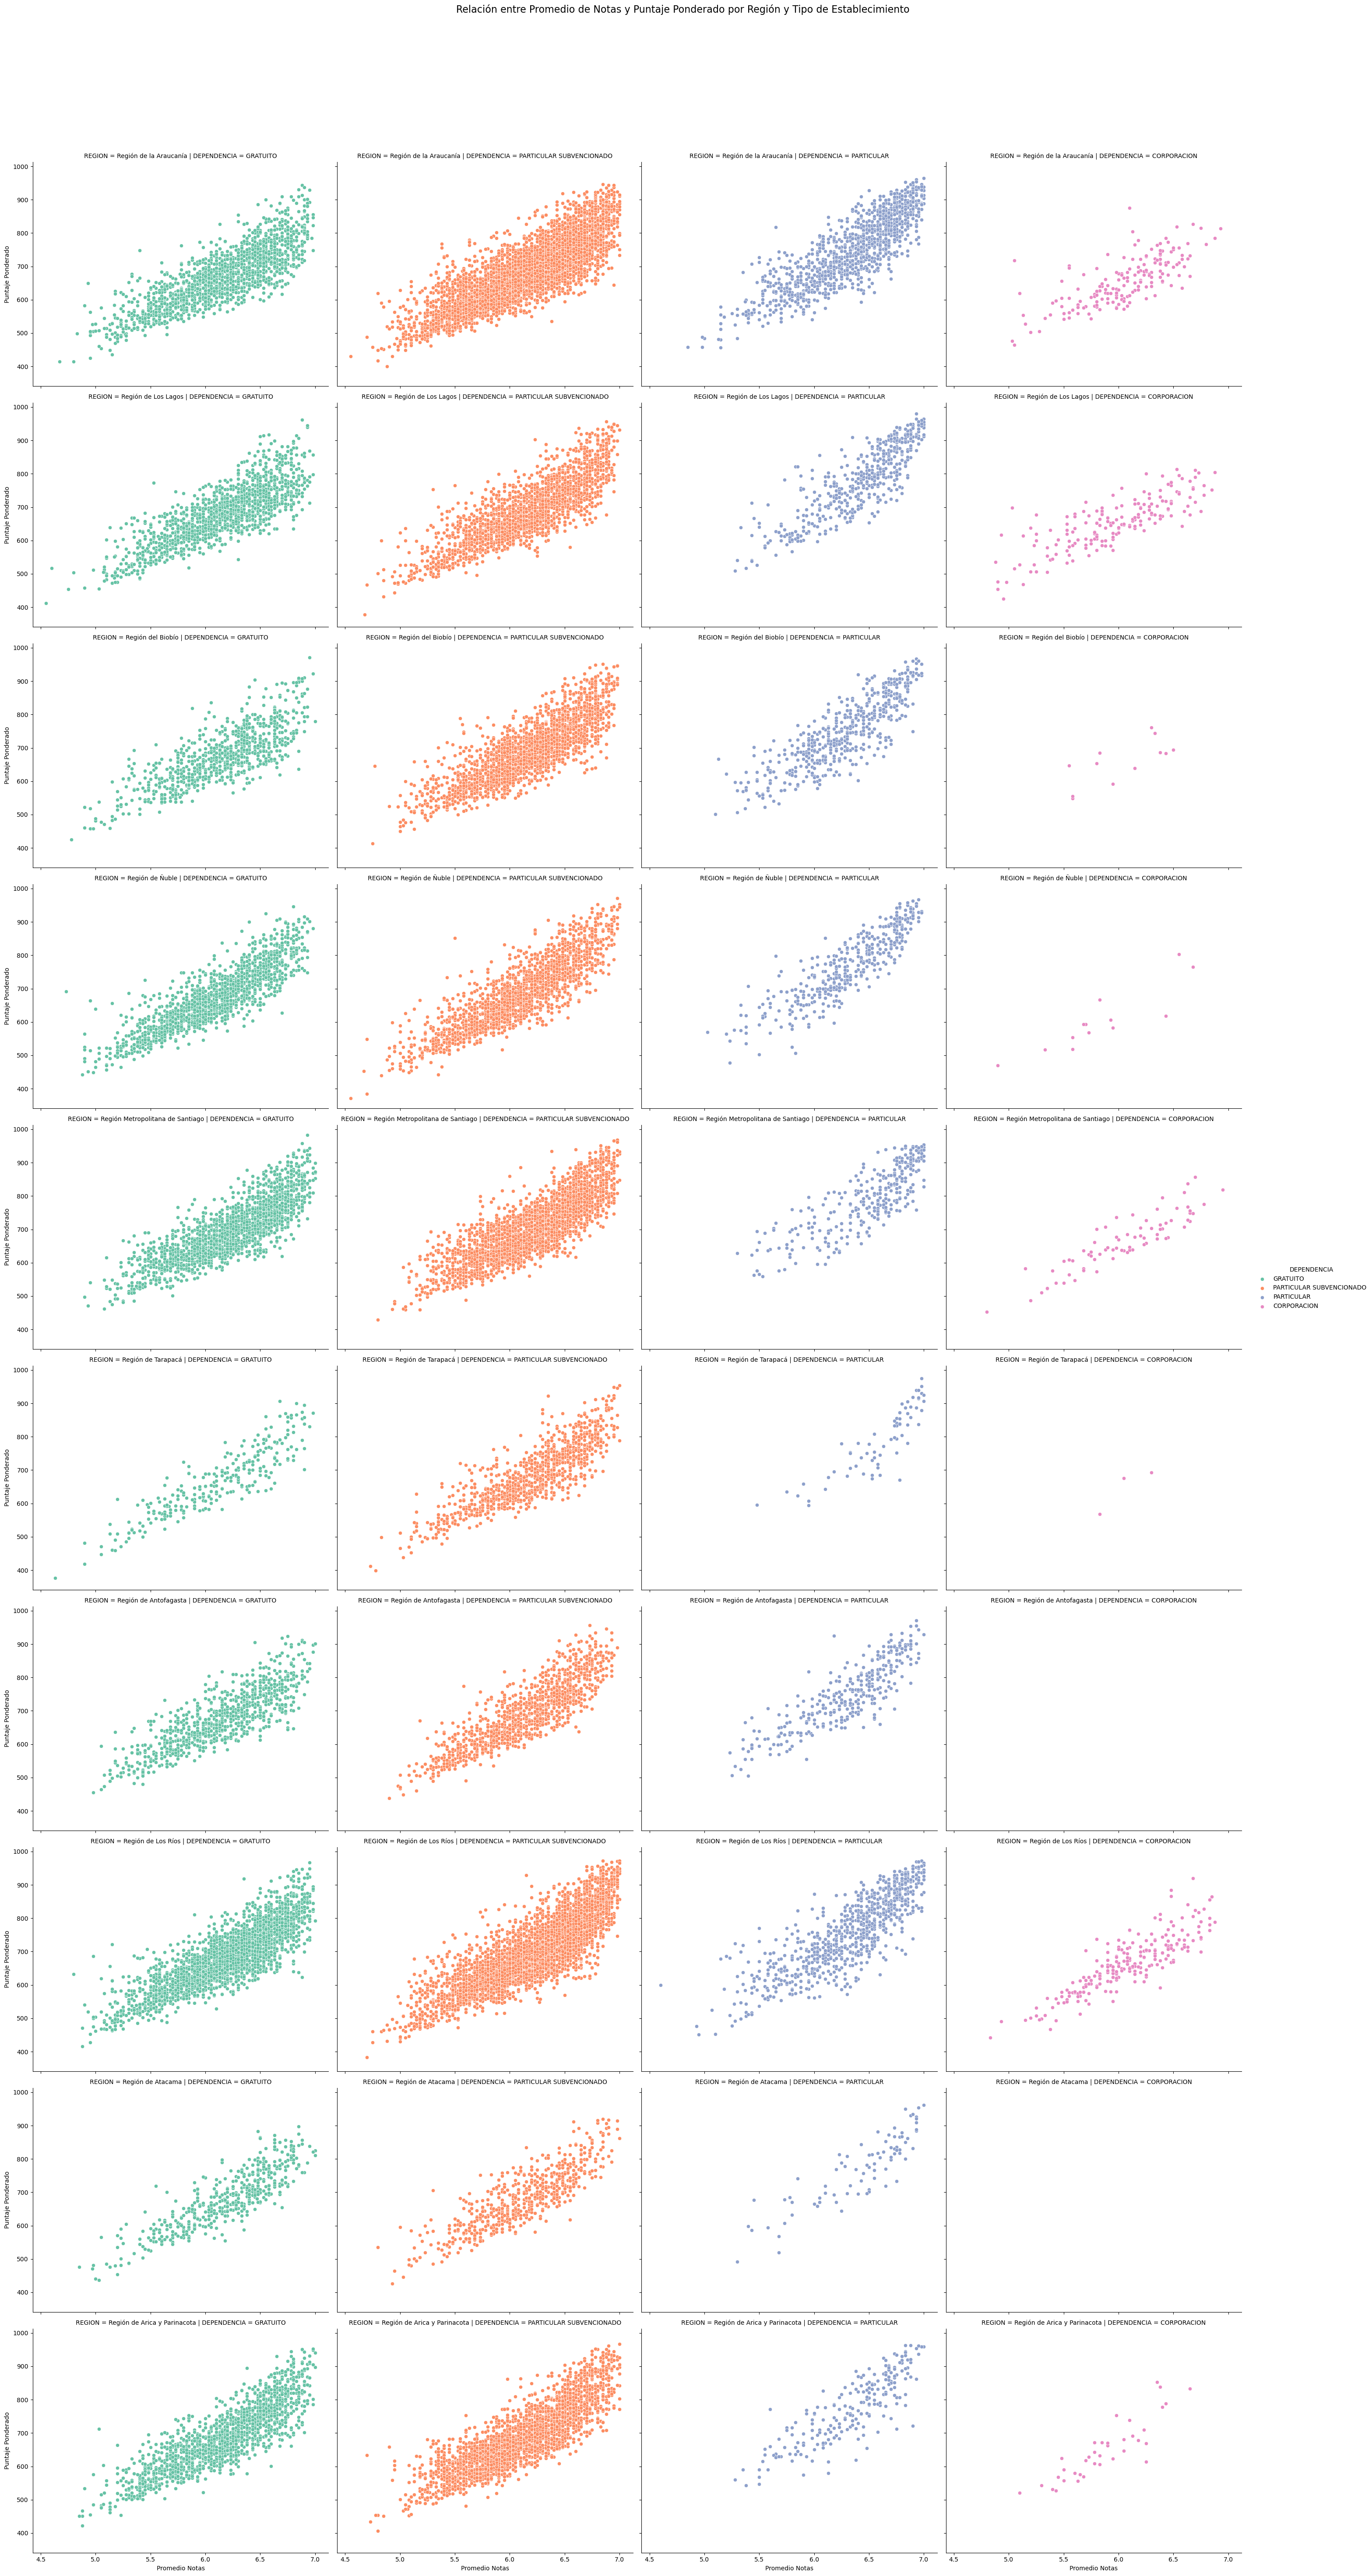